<a href="https://colab.research.google.com/github/Sid-9823/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <u>**Project Title : Health Insurance Cross Sell Prediction**</u>
#####**Project Type** - Classification

#####**Contribution** - Individual

#####**Individual name** - Siddhant Pal

#####**Cohort** - Berlin

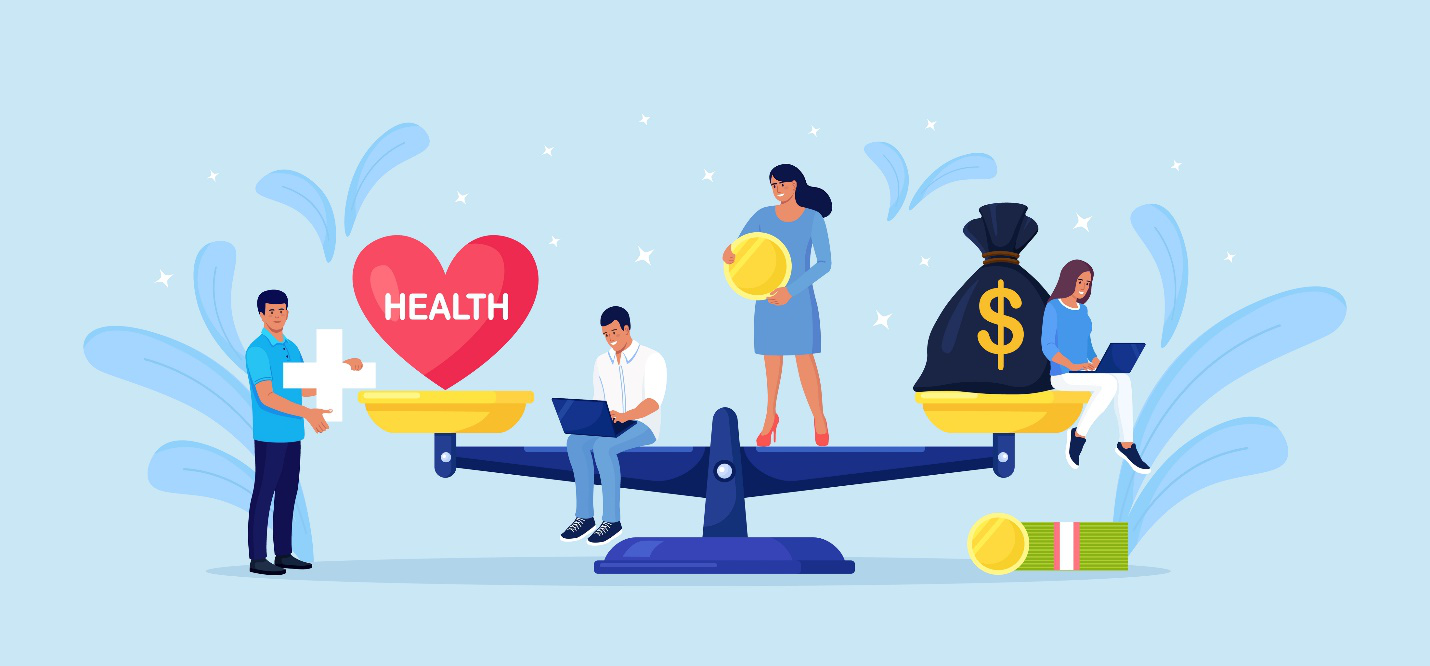

#**Project Summary**

Our client is an insurance firm that has supplied Health Insurance to its clients. They now require our assistance in developing a model to forecast if the policyholders (customers) from the previous year will be interested in the company's Vehicle Insurance. We have information about demographics (gender, age, area code type), vehicles (vehicle age, damage), policies (premium, sourcing channel), and so on to estimate whether the consumer would be interested in Vehicle insurance.

First, we loaded the required libraries and examined our data and its properties. We have a dataset with 3,81,109 rows and 12 columns that contains no duplicate or missing data. Following that, we extensively examined the characteristics and the data they represent.


In data wrangling, we removed the 'id' column because it is no longer useful to us. For better visualisation, we changed the values in the categorical columns Driving Licence and Previously Insured from 1 to Yes and No. To conserve space, we converted the 'Region_Code', 'Annual_Premium', and 'Policy_Sales_Channel' columns from float to int datatypes.

We next visualised our data and performed univariate and bivariate analysis with respect to the dependent variable. The findings from each chart are described. Finally in multivariate analysis, we visualised the correlation heatmap and 'sweetviz' library of python to derive valuable insights.

We generated three hypothetical statements and conduct hypothesis testing based on our visualisations. The following are the statements:
 * **The average yearly rate for auto insurance is more than 15,000.**

 *  **The average consumer is over 29 years old.**

 * **The yearly premium standard deviation is 15,000.**


The average yearly rate for auto insurance is more than 15,000. The average consumer is over the age of 29. The yearly premium standard deviation is 15,000.

In feature engineering, We used the capping approach to address outliers in the Annual Premium column. We could see all of the deleted outliers in the subsequent boxplot. We would not issue car insurance to someone who did not have a valid driver's licence. As a result, we removed the 'driving licence column because it provided no useful information. We then did one hot encoding on our categorical features, removing the first column as true. The data was unbalanced, with 46,710 label-1 items and 3,34,399 label-0 values in the dependent variable, "Response." The SMOTE technique was used to balance this unbalanced dataset. We then used the Standard scaler to scale our data. Finally, we divided our data into train and test segments in an 80/20 ratio.

In model implementation part, we used 5 models on our datasets : Logistic Regression, Decision Tree, Random Forest, Naive Bayes and Gradient Boosting.


 *   Logistic Regression
* Accuracy score = 81%, F1 - score = 83%, Roc Auc score = 81%

 * Decision Tree
* Accuracy score = 81%, F1 - score = 81%, Roc Auc score = 81%

 * Random Forest
* Accuracy score = 87%, F1 - score = 87%, Roc Auc score = 87%

 * Naive Bayes
* Accuracy score = 80%, F1 - score = 82%, Roc Auc score = 80%

 * Gradient Boosting
* Accuracy score = 83%, F1 - score = 84%, Roc Auc score = 83%


The Random forest Classifier has the highest F1 score of 87% for the test Set among all models. There is no evidence of overfitting.

Finally, the insurance business may apply a machine learning model based on the Random Forest Classifier to forecast if an existing health insurance client would be interested in a motor insurance policy. The firm may increase the conversion rate by taking initiatives to encourage individuals to get automobile insurance by giving incentives or simplifying the application and claim settlement procedures. Because the client acquisition cost stays zero, cross-selling may be an efficient way to boost earnings.

#**GitHub Link**

https://github.com/Sid-9823/Health-Insurance-Cross-Sell-Prediction

#**Problem statement**

**BUSINESS PROBLEM OVERVIEW**

Our client is an Insurance company that specialises in various types of insurance, and now they need our help in building a model that will predict if a
A policyholder (an existing customer) with Health Insurance is also interested in vehicle insurance.

To build this model, we have data regarding each customer, such as ID, Gender, age, driving licence, vehicle age, vehicle damage, etc.

### **Data Description**

**The dataset contains user information such as ID, Gender, Age, Driving License, Region_Code, Previously_insured, Vehicle_age, Vehicle_damage, Annual_premium, PolicySalesChannel, Vintage and Response.**

**Feature's Information :**
* ***id*** : *Unique ID for customer.*

* ***Gender*** : *Male / Female.*
* ***Age*** : *Age of customer.*
* ***Driving License*** : *Customer has DL or not*
* ***Region_code*** : *Unique code for the region of the customer.*
* ***Previously_insured*** : *Customer already has a vehicle insurance or not.*
* ***Vehicle_age*** : *Age of the vehicle*
* ***Vehicle_damage*** : *Past damages present or not*
* ***Annual_premium*** : *The amount customer needs to pay as premium.*
* ***PolicySalesChannel*** : *Anonymized Code for the channel of outreaching to the customer i.e Different Agents, Over Mail, Over Phone, In Person, etc.*
* ***Vintage*** : *Number of days, Customer has been associated with the company.*
* ***Response*** : *Customer is interested or not.*

#**Importing necessary libraries**

In [ ]:
# For numerical python, calculation and data manipulation.

import numpy as np
import pandas as pd

# For plotting plots and graphs.

import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# For Hypothesis Testing.

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# For Model Implementation.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# For evaluation.

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# For Model Explainibility.

!pip install shap
import shap
import graphviz
sns.set_style('darkgrid')

# For removing warning errors.

import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# **Data collection and analysis**

##**Data Loading and Basic Analysis**

In [ ]:
# Loading the data from csv file to a pandas dataframe.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
# Printing first 5 rows.

df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
 # Printing last 5 rows.

df.tail()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0

In [ ]:
# Checking the number of rows and columns in our dataset.

df.shape

(381109, 12)

In [ ]:
# Gathering information about our dataset such as null count values and data types involved.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
#  Getting the statistical measure of the dataframe.

df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [ ]:
# Printing number of unique values in our dataset.

df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [ ]:
# Checking null values.

df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* ***As we can see there are no missing values in this dataframe***

##**Data wrangling**

In [ ]:
# Renaming our column's.

df = df.rename(columns={'Gender':'gen','Age':'age','Driving_License':'dl','Region_Code':'rc','Previously_Insured':'pi','Vehicle_Age':'va',
                        'Vehicle_Damage':'vd','Annual_Premium':'ap','Policy_Sales_Channel':'psc','Vintage':'vint','Response':'res'})

* ***Changing column's names as per our convenience as it becomes easier working with small feature names.***

In [ ]:
# Dropping 'id' column as it's of no use in model building.

df.drop(['id'],axis=1,inplace=True)

In [ ]:
# Converting values in 'Driving License' and 'Previously Insured' column (1 = Yes else No).

df['dl'] = df['dl'].apply(lambda x: "Yes" if x==1 else "No")
df['pi'] = df['pi'].apply(lambda x: "Yes" if x==1 else "No")

In [ ]:
df.head()

gen  age   dl    rc   pi         va   vd       ap    psc  vint  res
0    Male   44  Yes  28.0   No  > 2 Years  Yes  40454.0   26.0   217    1
1    Male   76  Yes   3.0   No   1-2 Year   No  33536.0   26.0   183    0
2    Male   47  Yes  28.0   No  > 2 Years  Yes  38294.0   26.0    27    1
3    Male   21  Yes  11.0  Yes   < 1 Year   No  28619.0  152.0   203    0
4  Female   29  Yes  41.0  Yes   < 1 Year   No  27496.0  152.0    39    0

In [ ]:
# Changing dtypes of these column's from float to integer.

df['ap']  = df['ap'].astype(int)
df['psc'] = df['psc'].astype(int)
df['rc']  = df['rc'].astype(int)

In [ ]:
# Storing our numerical and categorical feature's in these variables.

numf = df.select_dtypes(exclude='object')  # Numerical feature's
catf = df.select_dtypes(include='object')  # Categorical feature's

In [ ]:
# Checking our numerical feature's.

numf.head()

age  rc     ap  psc  vint  res
0   44  28  40454   26   217    1
1   76   3  33536   26   183    0
2   47  28  38294   26    27    1
3   21  11  28619  152   203    0
4   29  41  27496  152    39    0

In [ ]:
# Checking our categorical feature's.

catf.head()

gen   dl   pi         va   vd
0    Male  Yes   No  > 2 Years  Yes
1    Male  Yes   No   1-2 Year   No
2    Male  Yes   No  > 2 Years  Yes
3    Male  Yes  Yes   < 1 Year   No
4  Female  Yes  Yes   < 1 Year   No

# **Exploratory Data Analysis and Visualization**

**What is EDA ?**

***Exploratory Data Analysis can be considered as a process which is used to visualise data and it helps to uncover the underlying pattern and relations between the dependent and independent variable's which can be useful in decision making.***

**We are performing the Vizualization in  a structured way while following "UBM" Rule.**

**U - Univariate Analysis,**

**B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)**

**M - Multivariate Analysis**

##**Univariate Analysis**

***We can define a univariate analysis as the type of analysis in which single feature analysis is performed. This type of analysis is solely focused on the distribution and pattern of the datapoints in a dataset.***

###**Gender**

Text(0.5, 1.0, 'Number of policy holders in different genders')

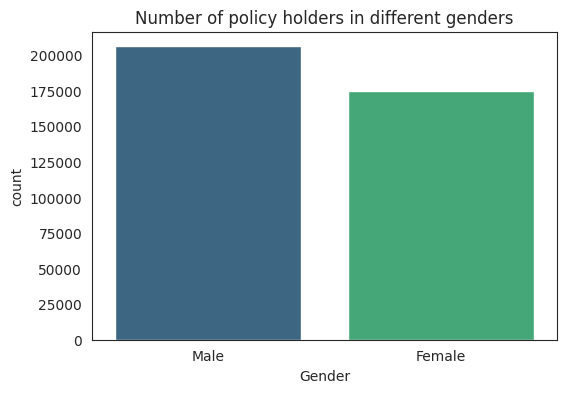

In [ ]:
# Plotting a countplot for this column.

sns.set_style(style='white')
plt.figure(figsize=(6,4))
sns.countplot(x=df['gen'],palette='viridis')
plt.xlabel('Gender')
plt.title('Number of policy holders in different genders')

* ***There are more number of males as compared to females in our dataset.***

In [ ]:
# Printing the total numbers of each category.

df['gen'].value_counts()

Male      206089
Female    175020
Name: gen, dtype: int64

* ***There are 206089 males and 175020 females present in our dataset.***

###**Driving License**

Text(0.5, 1.0, 'Number of policy holders having Driving License')

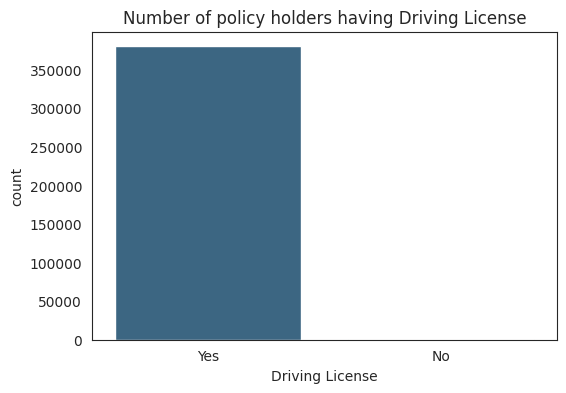

In [ ]:
# Plotting a countplot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['dl'],palette='viridis')
plt.xlabel('Driving License')
plt.title('Number of policy holders having Driving License')

* ***As we can see from the above countplot, almost all of the policyholders in our dataset have driving licences.***

In [ ]:
# Printing the total numbers of each category.

df['dl'].value_counts()

Yes    380297
No        812
Name: dl, dtype: int64

* ***There are only a very few people who do not have a driving licence, i.e., only 812 out of 381109.***

###**Age**

Text(0.5, 1.0, 'Distribution of Age')

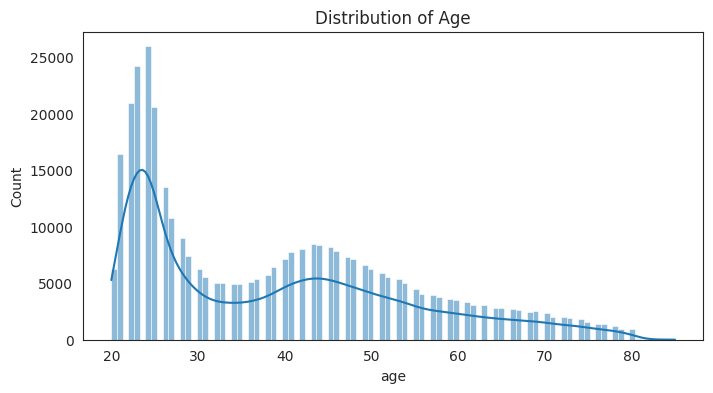

In [ ]:
# Plotting a histogram plot for this column.

plt.figure(figsize=(8,4))
sns.histplot(x=df['age'],kde=True)
plt.title('Distribution of Age')

* ***We can conclude by the above distribution that age feature is moderately right skewed.***

Text(0.5, 1.0, 'Number of policy holders in different age groups')

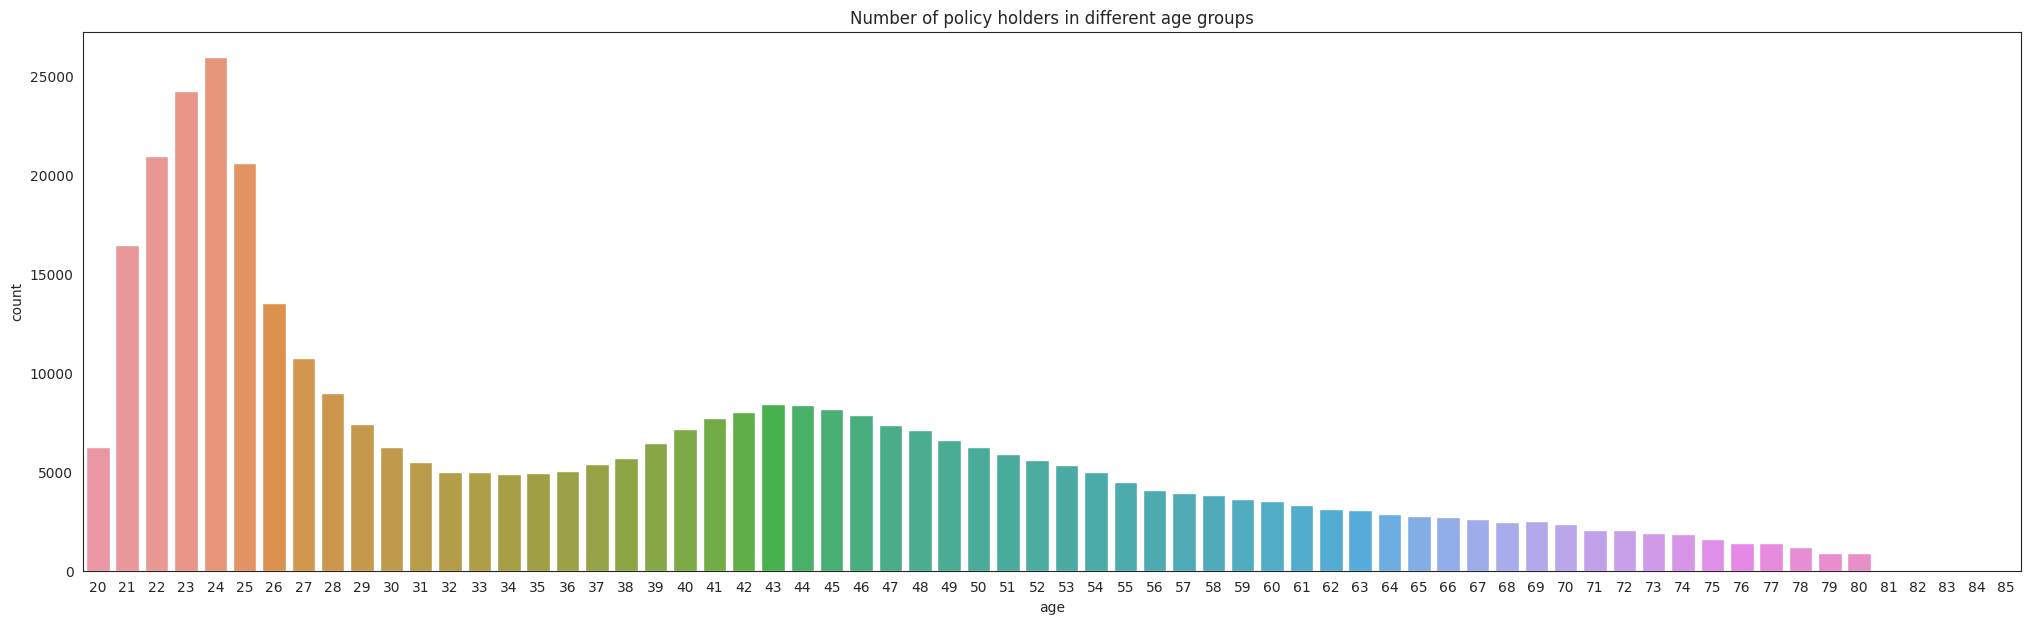

In [ ]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(25,7))
sns.countplot(x=df['age'])
plt.title('Number of policy holders in different age groups')

* ***We can conclude from the above countplot that the majority of our policyholders are young, aged 21 to 25.***

* ***While the minority mostly consists of older age-group customers.***

In [ ]:
# Printing the total numbers in each age category.

a = pd.DataFrame(df['age'].value_counts(sort=True).reset_index())
pd.DataFrame(a.sort_index())

index    age
0      24  25960
1      23  24256
2      22  20964
3      25  20636
4      21  16457
..    ...    ...
61     81     56
62     82     29
63     83     22
64     84     11
65     85     11

[66 rows x 2 columns]

* ***We have 25960 policyholders aged 24 and almost the same stats for individuals aged 22 and 23.***

* ***While the least number only consists of 11 policyholders aged 84 and 85.***

###**Region Code**

Text(0.5, 1.0, "Number of policy holder's belonging from different regions")

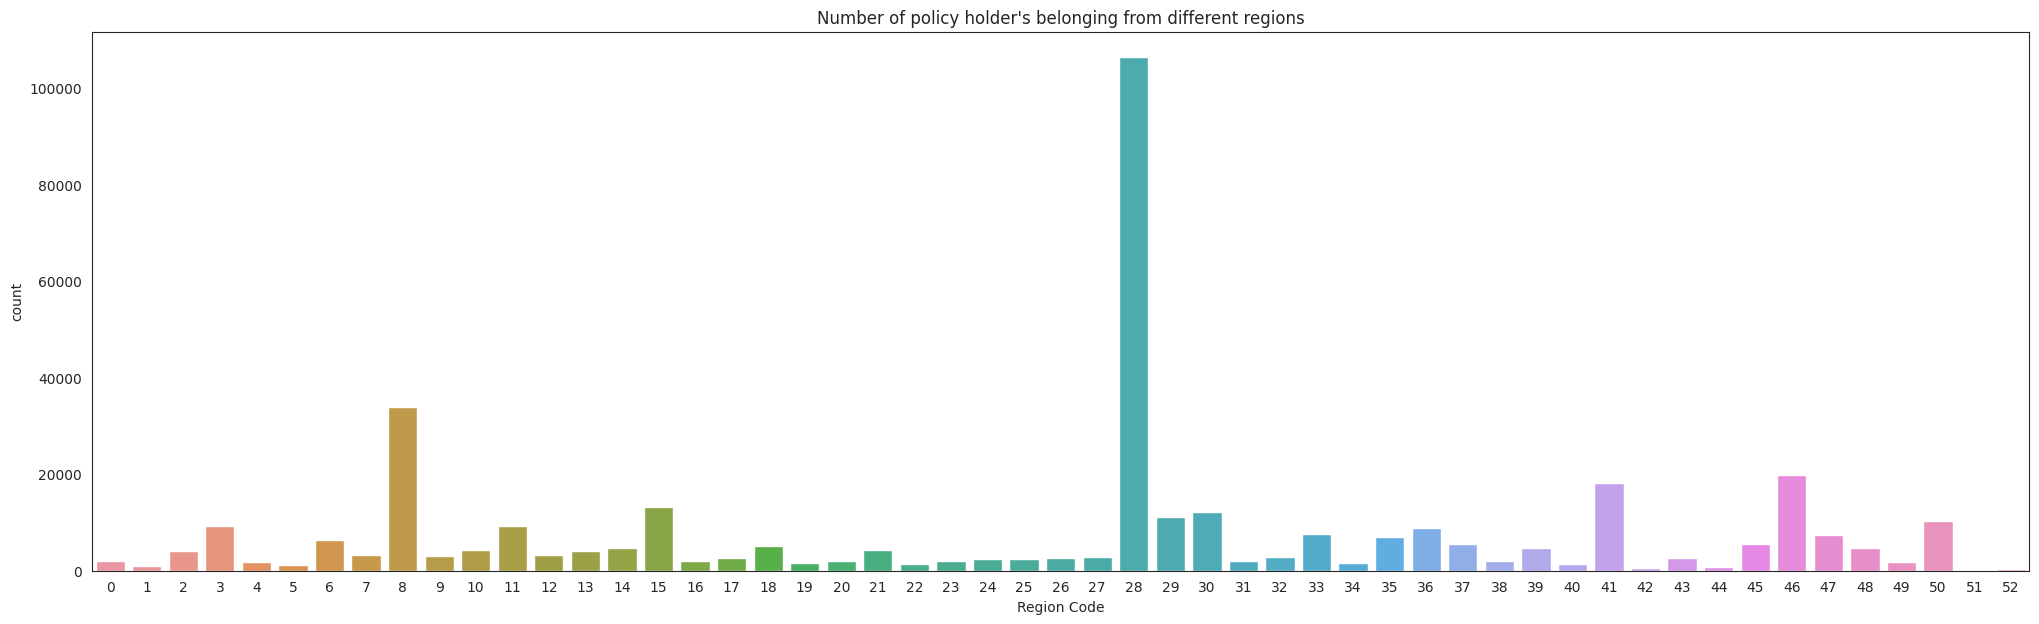

In [ ]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(25,7))
sns.countplot(x=df['rc'])
plt.xlabel('Region Code')
plt.title("Number of policy holder's belonging from different regions")

* ***We have around 106415 policyholders from the region whose code is 28.***

In [ ]:
# Printing the total numbers in each Region Code category.

a = pd.DataFrame(df['rc'].value_counts(sort=True).reset_index())
pd.DataFrame(a.sort_index())

index      rc
0      28  106415
1       8   33877
2      46   19749
3      41   18263
4      15   13308
5      30   12191
6      29   11065
7      50   10243
8       3    9251
9      11    9232
10     36    8797
11     33    7654
12     47    7436
13     35    6942
14      6    6280
15     45    5605
16     37    5501
17     18    5153
18     48    4681
19     14    4678
20     39    4644
21     10    4374
22     21    4266
23      2    4038
24     13    4036
25      7    3279
26     12    3198
27      9    3101
28     27    2823
29     32    2787
30     43    2639
31     17    2617
32     26    2587
33     25    2503
34     24    2415
35     38    2026
36      0    2021
37     16    2007
38     31    1960
39     23    1960
40     20    1935
41     49    1832
42      4    1801
43     34    1664
44     19    1535
45     22    1309
46     40    1295
47      5    1279
48      1    1008
49     44     808
50     42     591
51     52     267
52     51     183

* ***While the least number of policyholders are from regions whose code is 52, i.e., only 183.***

###**Previously insured**

Text(0.5, 1.0, 'Number of people who already have Vehicle insurance')

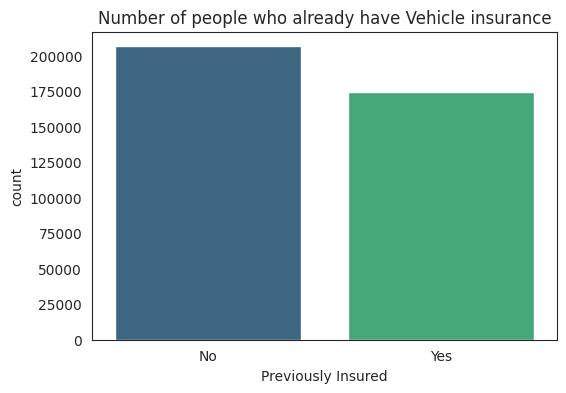

In [ ]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['pi'],palette='viridis')
plt.xlabel('Previously Insured')
plt.title('Number of people who already have Vehicle insurance')

* ***In the above countplot, we can see that there are more policy holders who don't have vehicle insurance.***

* ***These policyholders with no vehicle insurance could be company's potential target customers.***

In [ ]:
# Printing the total numbers of each category.

df['pi'].value_counts()

No     206481
Yes    174628
Name: pi, dtype: int64

* ***There are 206481 policyholders with no vehicle insurance, while the number of individuals with vehicle insurance stands at 174628.***

###**Vehicle Age**

Text(0.5, 1.0, 'Age of the vehicle')

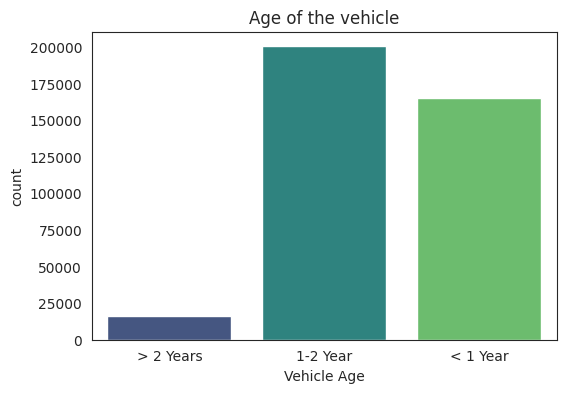

In [ ]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['va'],palette='viridis')
plt.xlabel('Vehicle Age')
plt.title('Age of the vehicle')

* ***The majority of our policy holders (200316) have a vehicle age of around 1 to 2 years.***

* ***There are also a high number of policy holders who have recently purchased their vehicle, i.e., 164786 individuals who have purchased a vehicle less than a year ago. These customers with new vehicles could most likely purchase vehicle insurance.***

* ***There are only about 16007 policyholders whose vehicles are older than 2 years.***

In [ ]:
# Printing the total numbers of each category.

df['va'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: va, dtype: int64

###**Vehicle Damage**

Text(0.5, 1.0, 'Past damages present or not')

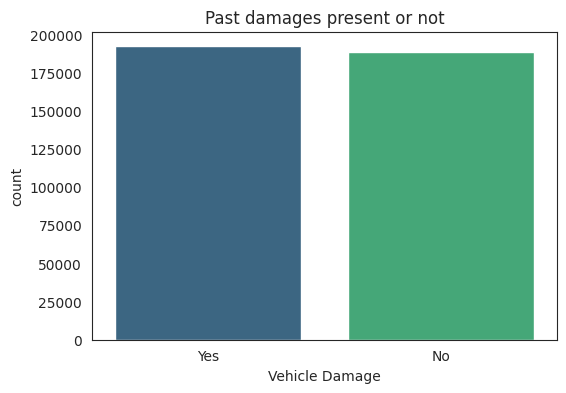

In [ ]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['vd'],palette='viridis')
plt.xlabel('Vehicle Damage')
plt.title('Past damages present or not')

* ***We can see from the above countplot that almost 50% of customers have vehicle damage, while the other 50% do not.***

In [ ]:
# Printing the total numbers of each category.

df['vd'].value_counts()

Yes    192413
No     188696
Name: vd, dtype: int64

* ***1,92,413 customers have damage to their vehicles, while the other 1,88,696 do not have any damage.***

###**Annual Premium**

Text(0.5, 0, 'Annual Premium')

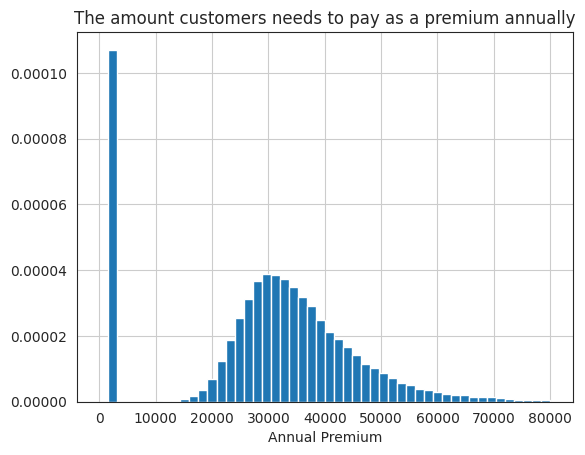

In [ ]:
# Plotting a histogram plot for this column.

df['ap'].hist(bins = 50, density = True, range=[0, 80000])
plt.title('The amount customers needs to pay as a premium annually')
plt.xlabel('Annual Premium')

* ***We can see it is following a normal distribution.***

In [ ]:
# Printing the total numbers in each annual premium category.

pd.DataFrame(df['ap'].value_counts(sort=True).reset_index())

index     ap
0        2630  64877
1       69856    140
2       39008     41
3       38287     38
4       45179     38
...       ...    ...
48833   14838      1
48834   52535      1
48835   15182      1
48836  143525      1
48837   69845      1

[48838 rows x 2 columns]

* ***Out of all policy holders, many (64,877) of them are paying an annual premium of 2630, while the rest are paying between 20,000 and 60,000.***

###**PolicySalesChannel**

Text(0.5, 1.0, 'Distribution of values in Policy Sales Channel')

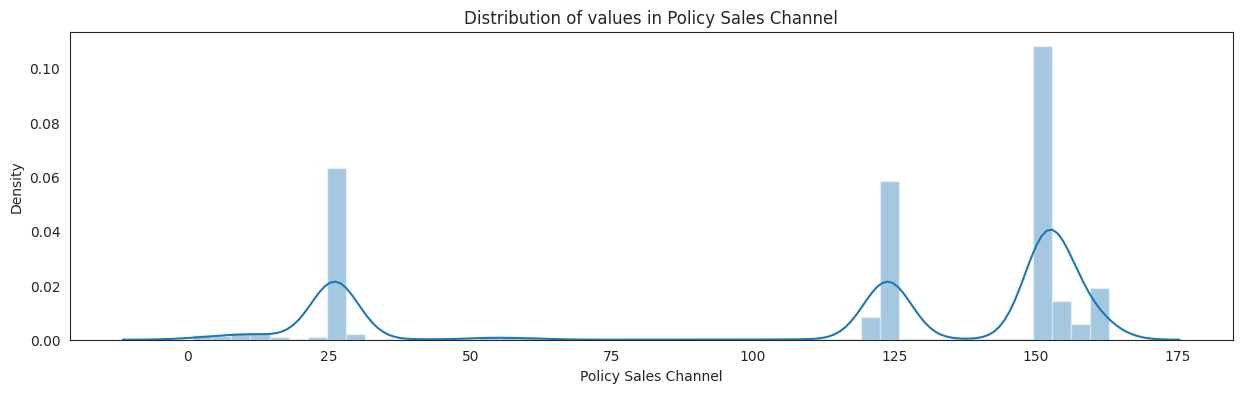

In [ ]:
# Plotting a distribution plot for this column.

plt.figure(figsize=(15,4))
sns.distplot(x=df['psc'],kde=True)
plt.xlabel('Policy Sales Channel')
plt.title('Distribution of values in Policy Sales Channel')

* ***PolicySalesChannel of code 152 has the highest peak, followed by 26 and 124.***

In [ ]:
# Printing the total numbers of each category.

df['psc'].value_counts(sort=True).head(20)

152    134784
26      79700
124     73995
160     21779
156     10661
122      9930
157      6684
154      5993
151      3885
163      2893
13       1865
25       1848
7        1598
8        1515
30       1410
55       1264
155      1234
11       1203
1        1074
52       1055
Name: psc, dtype: int64

* ***SalesChannel 152 has the highest number of customers, i.e., 1,34,784, followed by 26 (79,700) and 124 (73,995).***

###**Vintage**

Text(0.5, 1.0, 'Number of days customer has been associated with the company')

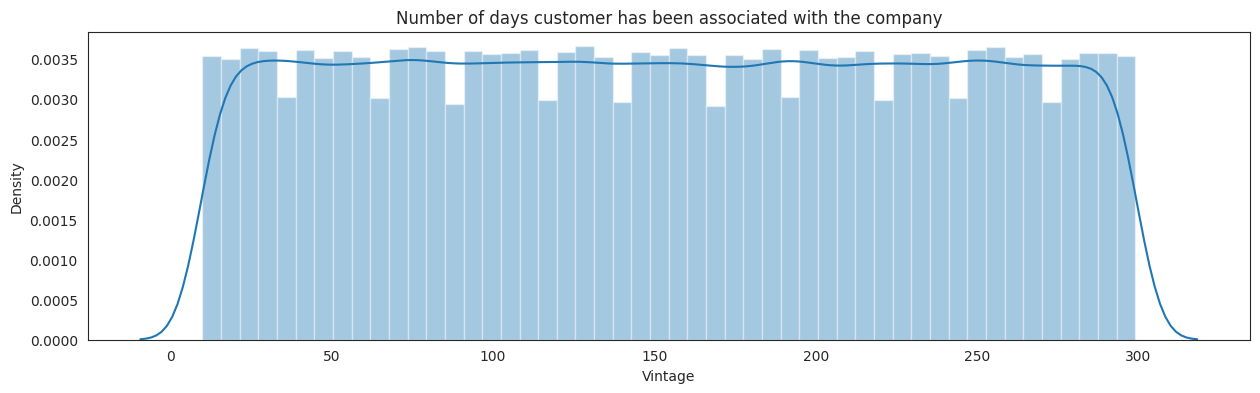

In [ ]:
# Plotting a distribution plot for this column.

plt.figure(figsize=(15,4))
sns.distplot(x=df['vint'])
plt.xlabel('Vintage')
plt.title('Number of days customer has been associated with the company')

* ***The majority of the customers have been associated with the company for a longer period of time.***

In [ ]:
# Printing the total numbers of each category.

pd.DataFrame(df['vint'].value_counts(sort=True).reset_index())

index  vint
0      256  1418
1       73  1410
2      282  1397
3      158  1394
4      187  1392
..     ...   ...
285    205  1235
286     89  1234
287     32  1230
288    224  1227
289    277  1226

[290 rows x 2 columns]

###**Response**

Text(0.5, 1.0, 'Number of people interested in vehicle insurance')

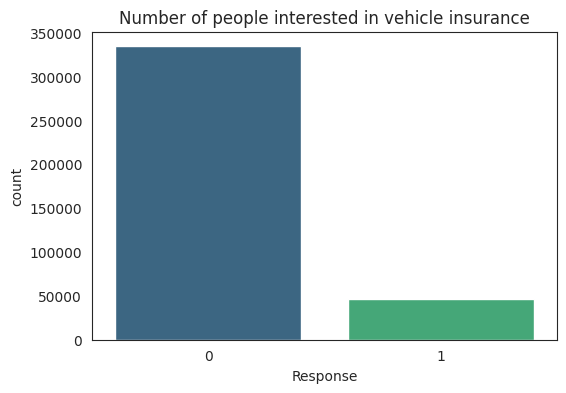

In [ ]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['res'],palette='viridis')
plt.xlabel('Response')
plt.title('Number of people interested in vehicle insurance')

* ***Majority of the customers are not interested in a vehicle insurance.***

In [ ]:
# Printing the total numbers of each category.

df['res'].value_counts()

0    334399
1     46710
Name: res, dtype: int64

* ***Out of 3,81,109, only 46,710 are interested in vehicle insurance.***

## **Bivariate Analysis**

***A bivariate analysis is a type in which two variable's are taken into consideration and underlying relationship between the two is analysed.***

### **Analysis of Dependent variable vs. Categorical data type**

***Here, we are trying to find the underlying relationship's between dependent(Output) and independent variable's one by one. First, we will proceed with relationship's of dependent variable(Output) with categorical and object data type's then afterwards with numerical or integer data type's.***

####**Gender vs. Response**

Text(0.5, 1.0, 'Response of customers from each category')

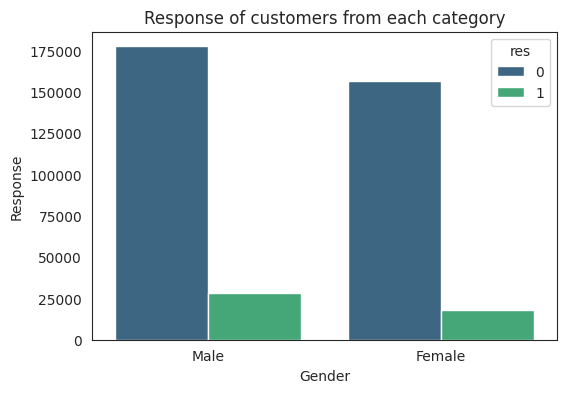

In [ ]:
# Plotting a countplot.

plt.figure(figsize=(6,4))
sns.countplot(x='gen',hue = 'res',data=df,palette ='viridis')
plt.xlabel('Gender')
plt.ylabel('Response')
plt.title('Response of customers from each category')

* ***We are getting slightly higher positive responses from males as compared to females.***

In [ ]:
# Printing the total numbers of each category.

df['gen'].value_counts()

Male      206089
Female    175020
Name: gen, dtype: int64

####**Driving License vs. Response**

Text(0.5, 1.0, 'Customers who have DL or not response')

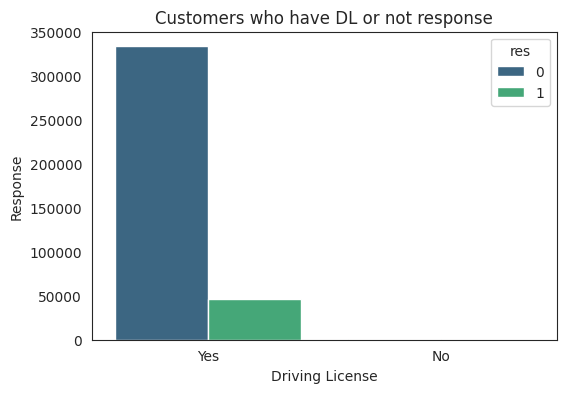

In [ ]:
# Plotting a countplot.

plt.figure(figsize=(6,4))
sns.countplot(x='dl',hue='res',data=df,palette='viridis')
plt.xlabel('Driving License')
plt.ylabel('Response')
plt.title('Customers who have DL or not response')

* ***Every customer has a driving licence in our dataset.***

* ***There are few customers with DLs purchasing vehicle insurance.***

In [ ]:
# Printing the total numbers of each category.

df['dl'].value_counts()

Yes    380297
No        812
Name: dl, dtype: int64

####**Previously Insured vs. Response**

Text(0.5, 1.0, 'Previously Insured customers response')

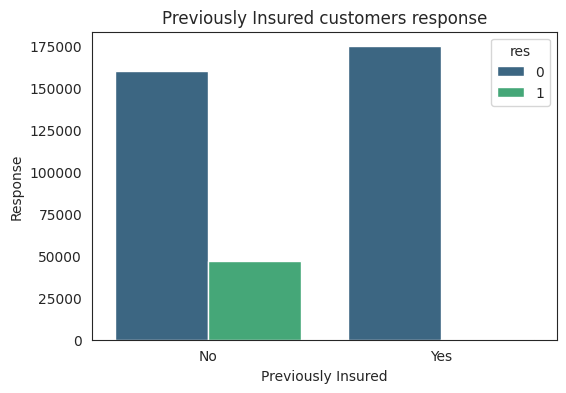

In [ ]:
# Plotting a countplot.

plt.figure(figsize=(6,4))
sns.countplot(x='pi',hue = 'res',data=df,palette='viridis')
plt.xlabel('Previously Insured')
plt.ylabel('Response')
plt.title('Previously Insured customers response')

* ***Customers who already have vehicle insurance are not buying, obviously.***

* ***Few customers with no vehicle insurance are purchasing insurance.***

In [ ]:
# Printing the total numbers of each category.

df['pi'].value_counts()

No     206481
Yes    174628
Name: pi, dtype: int64

####**Vehicle Age vs. Response**

Text(0.5, 1.0, 'Customers Vehicle Age and their response')

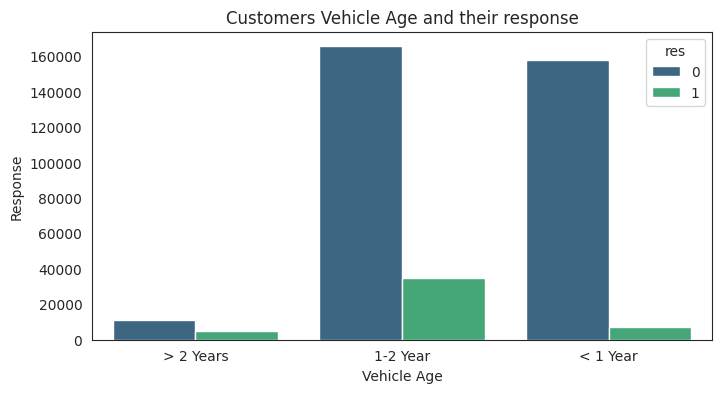

In [ ]:
# Plotting a countplot.

plt.figure(figsize=(8,4))
sns.countplot(x='va',hue = 'res',data=df,palette='viridis')
plt.xlabel('Vehicle Age')
plt.ylabel('Response')
plt.title('Customers Vehicle Age and their response')

* ***Customers with a vehicle age of 0–1 years are purchasing vehicle insurance more as compared to customers with a vehicle age of less than 1 year or greater than 2 years.***

In [ ]:
# Printing the total numbers of each category.

df['va'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: va, dtype: int64

####**Vehicle Damage vs. Response**

Text(0.5, 1.0, 'Customers Vehicle Damage and their response')

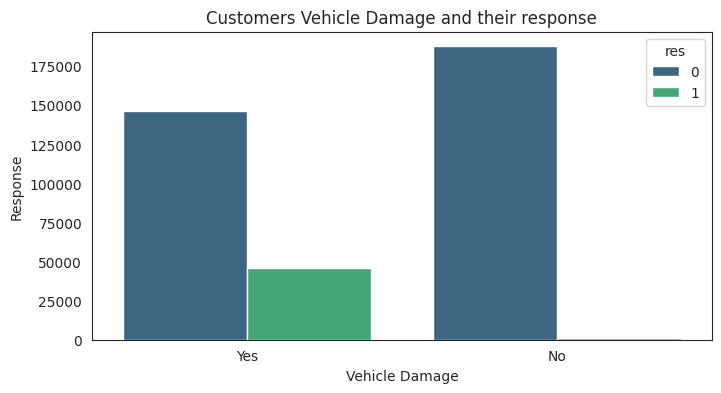

In [ ]:
# Plotting a countplot.

plt.figure(figsize=(8,4))
sns.countplot(x='vd',hue = 'res',data=df,palette='viridis')
plt.xlabel('Vehicle Damage')
plt.ylabel('Response')
plt.title('Customers Vehicle Damage and their response')

* ***Customers with no vehicle damage are not purchasing vehicle insurance.***

* ***There are a few customers with vehicle damage who are purchasing vehicle insurance.***

In [ ]:
# Printing the total numbers of each category.

df['vd'].value_counts()

Yes    192413
No     188696
Name: vd, dtype: int64

###**Analysis of Dependent variable vs. Numerical data type**

####**Age vs. Response**

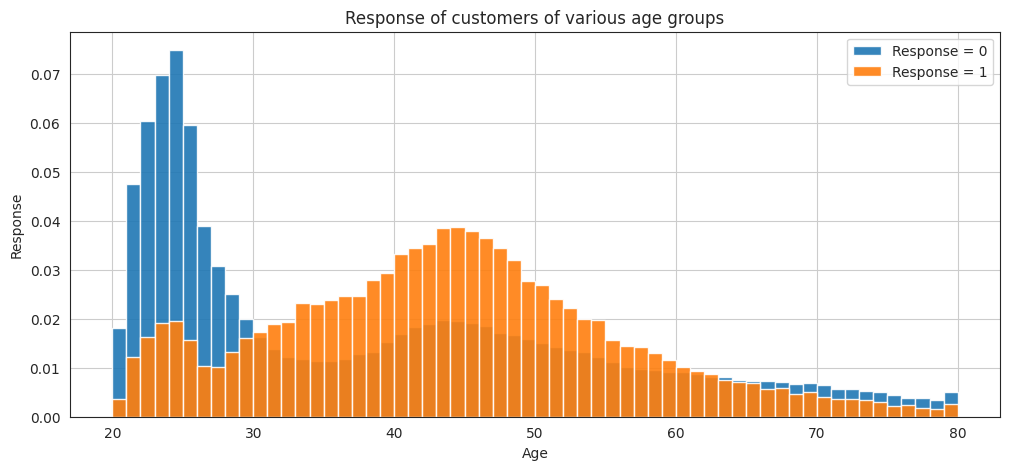

In [ ]:
# Plotting a histogram.

df.groupby('res').age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(12,5), density = True, alpha = .9)
plt.xlabel('Age')
plt.ylabel('Response')
plt.title('Response of customers of various age groups')
plt.legend(['Response = 0','Response = 1'])

* ***Customers in the age groups of 20 to 25 and 30 to 50 are the ones who are purchasing vehicle insurance.***

In [ ]:
# Printing the total numbers in each age category.

a = pd.DataFrame(df['age'].value_counts(sort=True).reset_index())
pd.DataFrame(a.sort_index())

index    age
0      24  25960
1      23  24256
2      22  20964
3      25  20636
4      21  16457
..    ...    ...
61     81     56
62     82     29
63     83     22
64     84     11
65     85     11

[66 rows x 2 columns]

####**Region Code vs. Response**

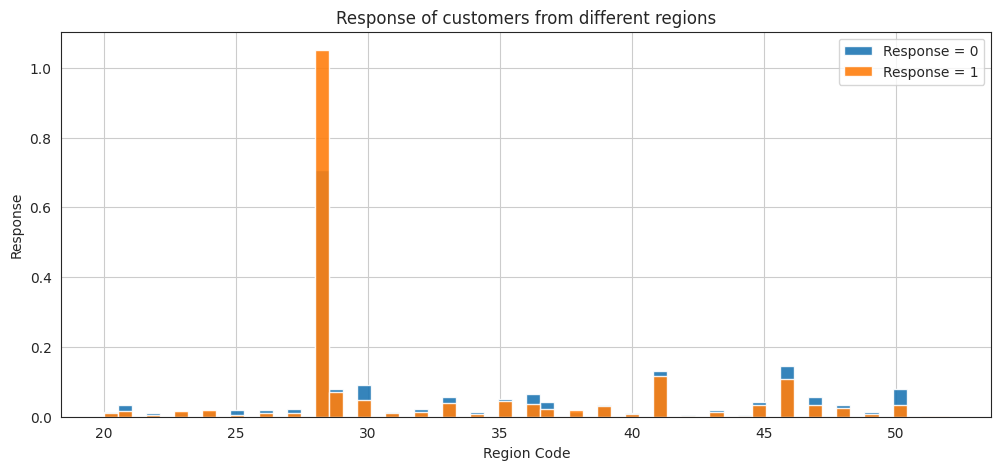

In [ ]:
# Plotting a histogram.

df.groupby('res').rc.hist(range=[20, 52], align = 'mid', bins=60, figsize=(12,5), density = True, alpha = .9)
plt.xlabel('Region Code')
plt.ylabel('Response')
plt.title('Response of customers from different regions')
plt.legend(['Response = 0','Response = 1'])

* ***In the region whose code is 28, customers are purchasing the most vehicle insurance.***

In [ ]:
# Printing the total numbers in each Region Code category.

a = pd.DataFrame(df['rc'].value_counts(sort=True).reset_index())
pd.DataFrame(a.sort_index())

index      rc
0      28  106415
1       8   33877
2      46   19749
3      41   18263
4      15   13308
5      30   12191
6      29   11065
7      50   10243
8       3    9251
9      11    9232
10     36    8797
11     33    7654
12     47    7436
13     35    6942
14      6    6280
15     45    5605
16     37    5501
17     18    5153
18     48    4681
19     14    4678
20     39    4644
21     10    4374
22     21    4266
23      2    4038
24     13    4036
25      7    3279
26     12    3198
27      9    3101
28     27    2823
29     32    2787
30     43    2639
31     17    2617
32     26    2587
33     25    2503
34     24    2415
35     38    2026
36      0    2021
37     16    2007
38     31    1960
39     23    1960
40     20    1935
41     49    1832
42      4    1801
43     34    1664
44     19    1535
45     22    1309
46     40    1295
47      5    1279
48      1    1008
49     44     808
50     42     591
51     52     267
52     51     183

####**Annual Premium vs. Response**

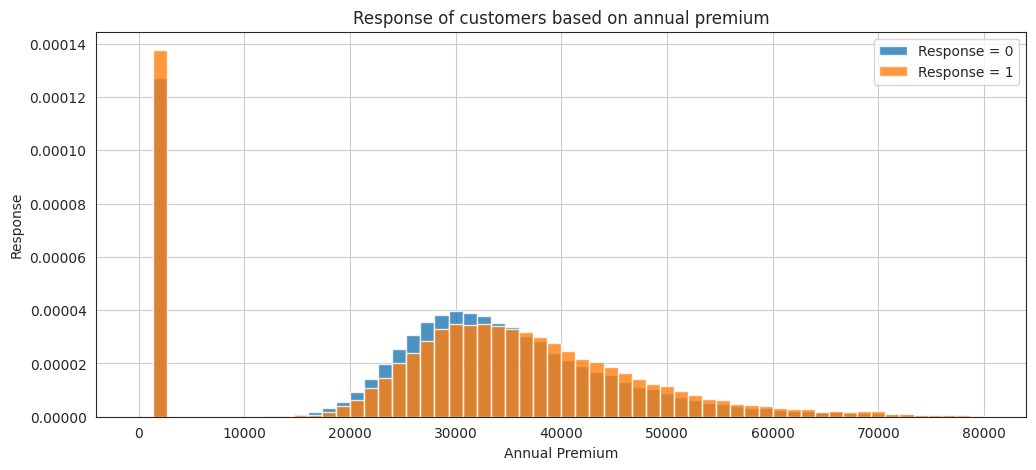

In [ ]:
# Plotting a histogram.

df.groupby('res').ap.hist(range=[0, 80000], align = 'mid', bins=60, figsize=(12,5), density = True, alpha = .8)
plt.xlabel('Annual Premium')
plt.ylabel('Response')
plt.title('Response of customers based on annual premium')
plt.legend(['Response = 0','Response = 1'])

* ***The majority of customers with vehicle insurance would have to pay an annual premium of 2630, while others would pay in the range of 20,000 to 60,000.***

In [ ]:
# Printing the total numbers in each annual premium category.

pd.DataFrame(df['ap'].value_counts(sort=True).reset_index())

index     ap
0        2630  64877
1       69856    140
2       39008     41
3       38287     38
4       45179     38
...       ...    ...
48833   14838      1
48834   52535      1
48835   15182      1
48836  143525      1
48837   69845      1

[48838 rows x 2 columns]

####**PolicySalesChannel vs. Response**

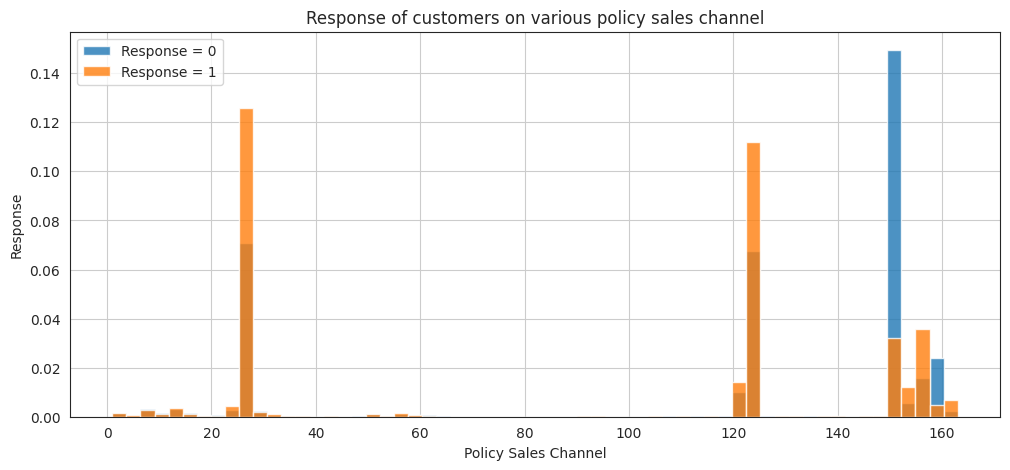

In [ ]:
df.groupby('res').psc.hist(align = 'mid', bins=60, figsize=(12,5), density = True, alpha = .8)
plt.xlabel('Policy Sales Channel')
plt.ylabel('Response')
plt.title('Response of customers on various policy sales channel')
plt.legend(['Response = 0','Response = 1'])

* ***The majority of customers registered through policy sales channels 26 and 124 have purchased vehicle insurance.***

In [ ]:
# Printing the total numbers of each category.

df['psc'].value_counts(sort=True).head(20)

152    134784
26      79700
124     73995
160     21779
156     10661
122      9930
157      6684
154      5993
151      3885
163      2893
13       1865
25       1848
7        1598
8        1515
30       1410
55       1264
155      1234
11       1203
1        1074
52       1055
Name: psc, dtype: int64

## **Multivariate Analysis**

***A multivariate analysis is a type in which more than two variable's are taken into consideration and underlying relationship between them is analysed.***

### **Sweetviz**

* ***Sweetviz is an open-source Python tool that provides attractive, high-density visualisations to jumpstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application. The technology is designed to let users easily see target values and compare datasets.***

* ***We can use this technique even for predicting correlation between numerical and categorical features.***

In [ ]:
!pip install sweetviz  # Installing sweetviz
import sweetviz as sv  # Importing sweetviz

In [ ]:
rep = sv.analyze(df)      # Applying sweetviz on our dataset.

                                             |          | [  0%]   00:00 -> (? left)

Report rep.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



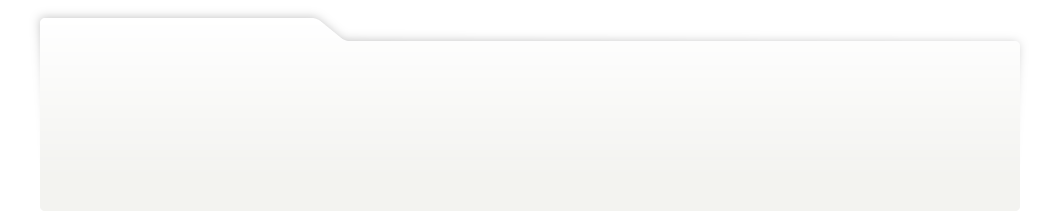
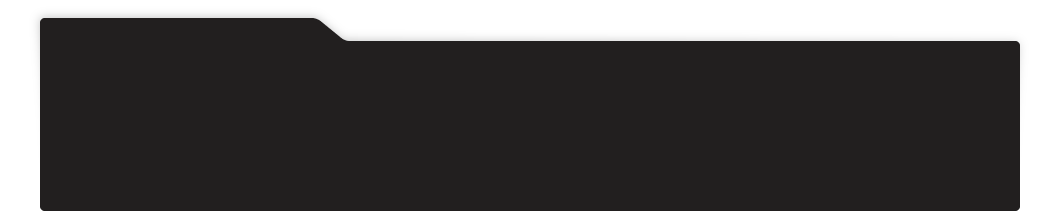
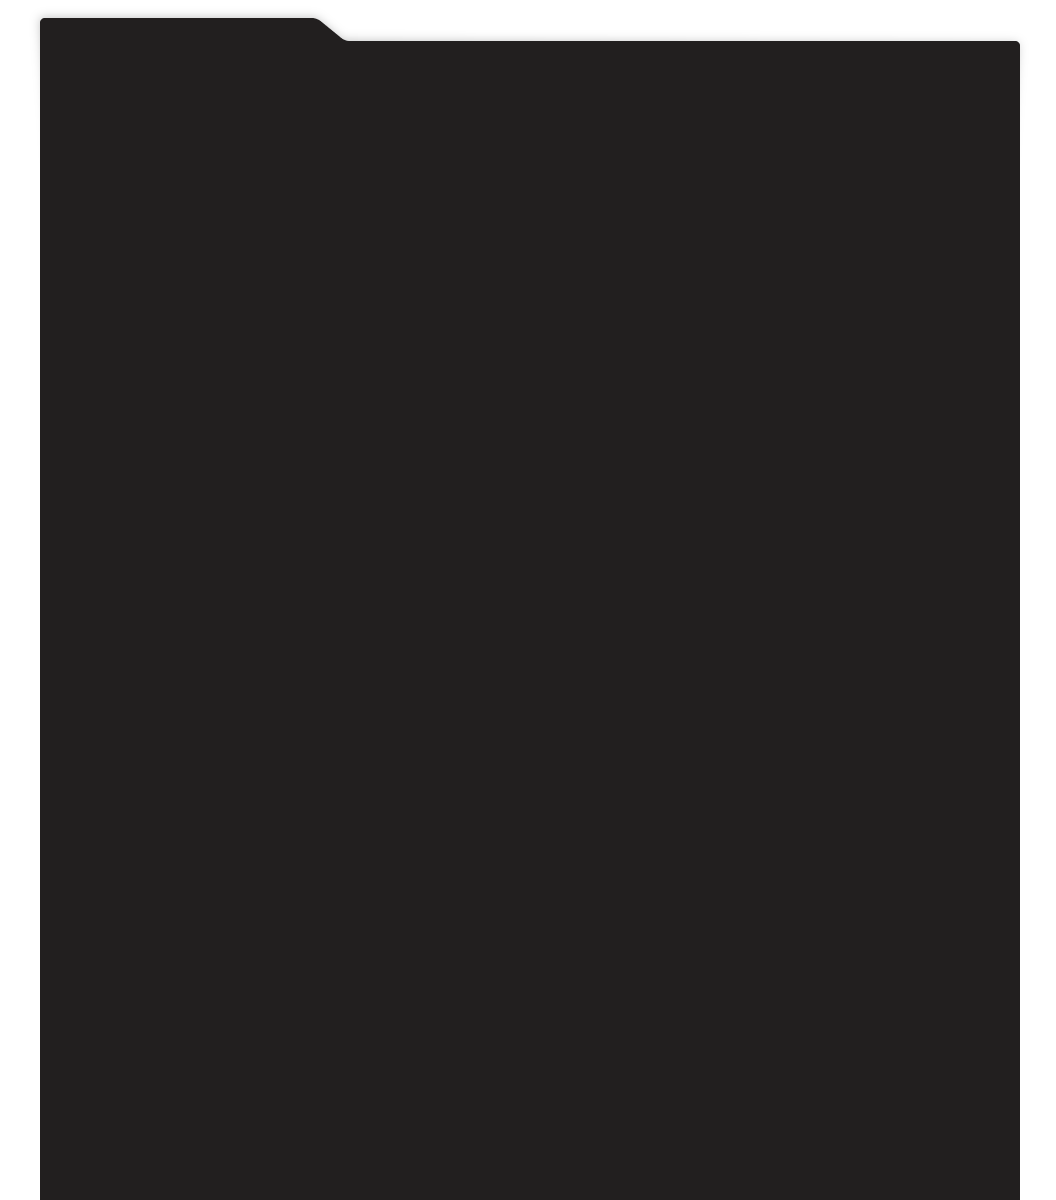
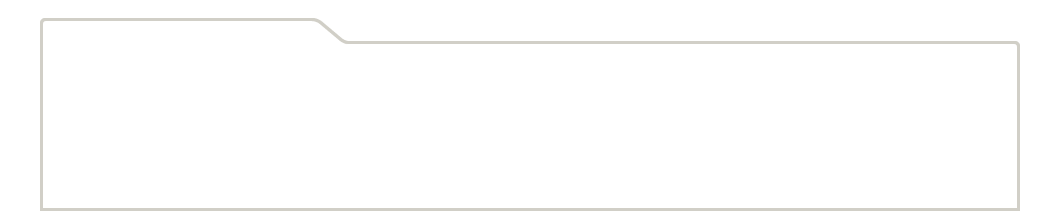
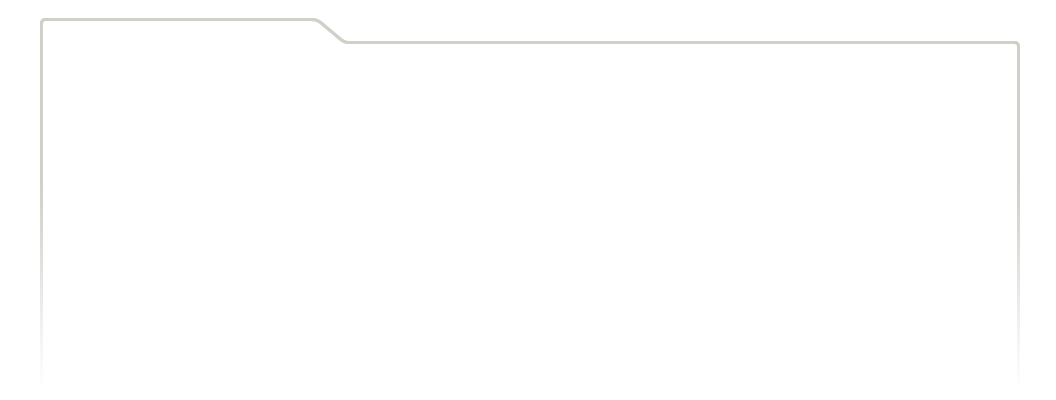
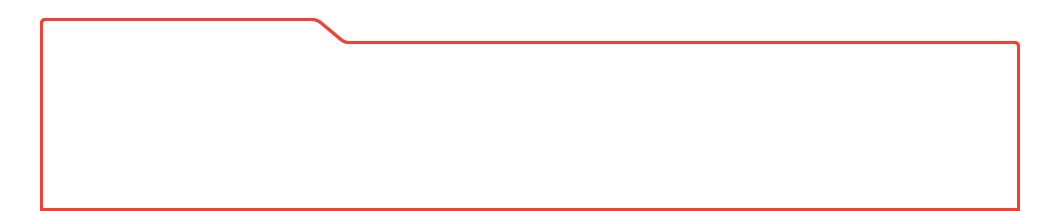
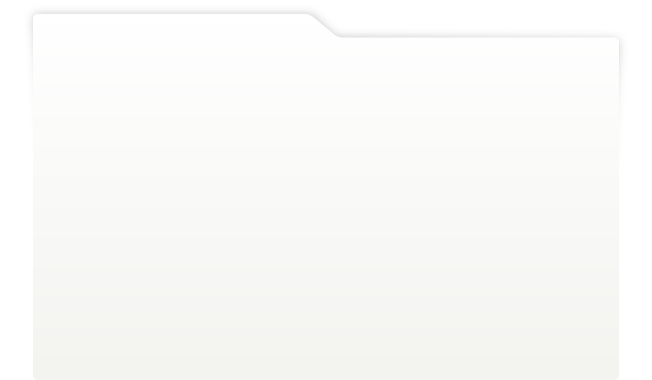
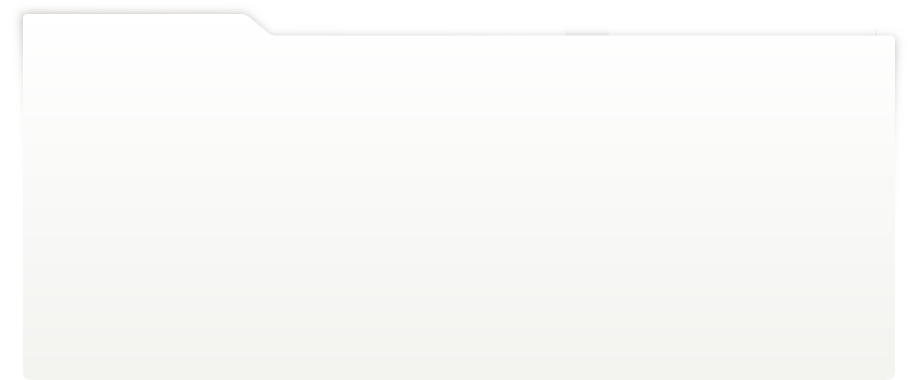
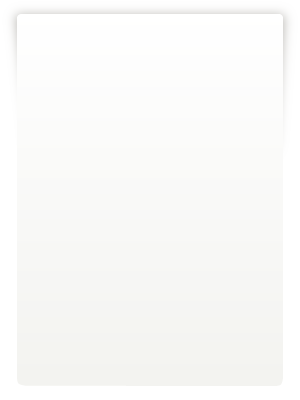
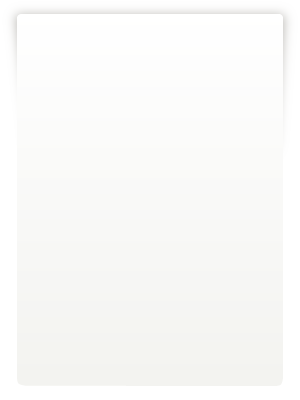
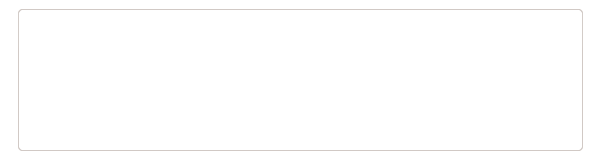
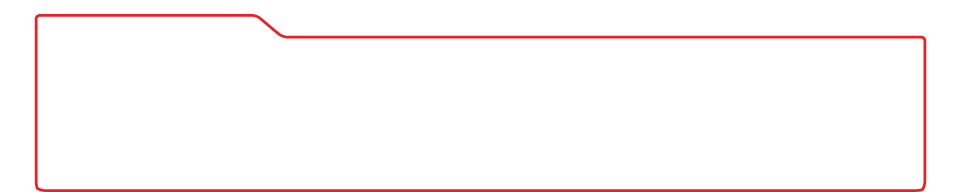
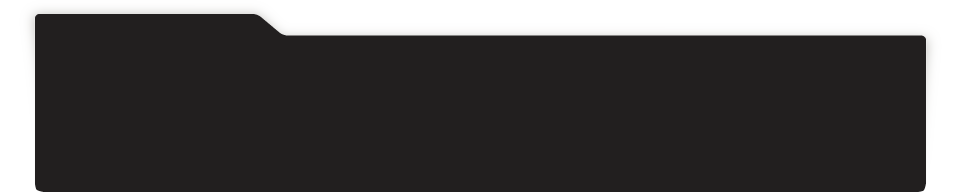
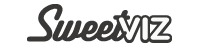
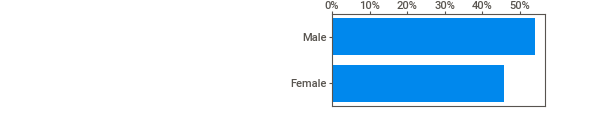
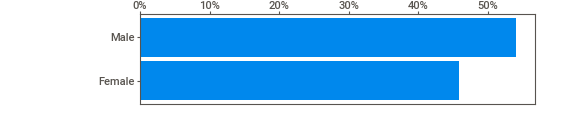
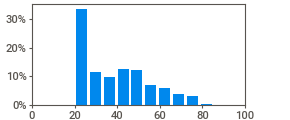
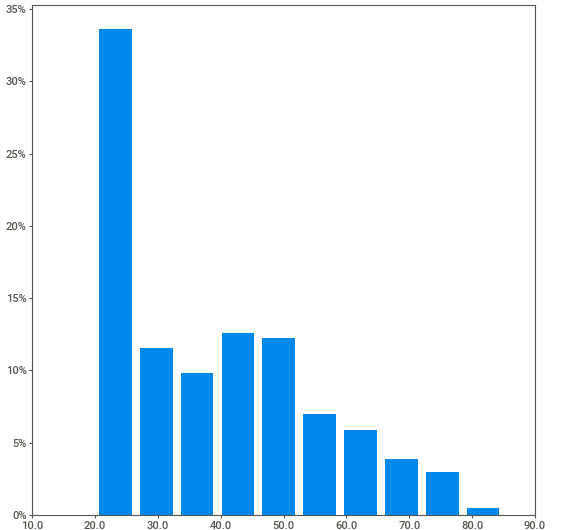
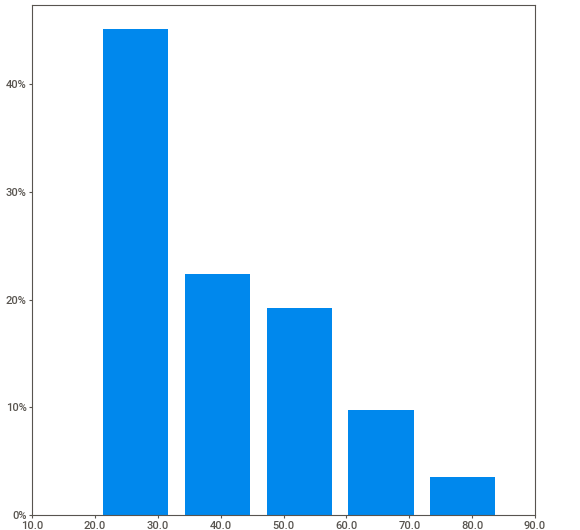
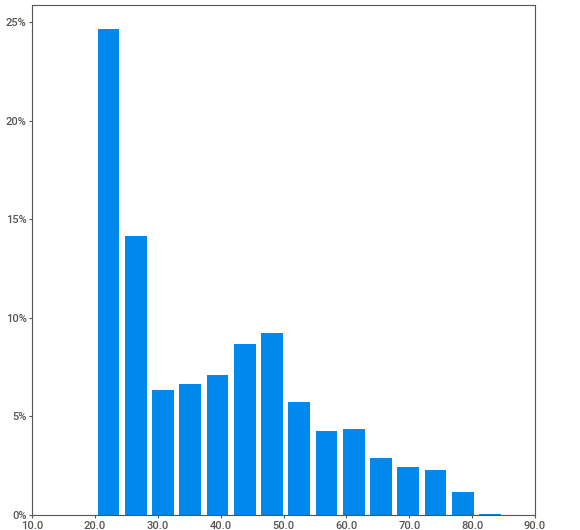
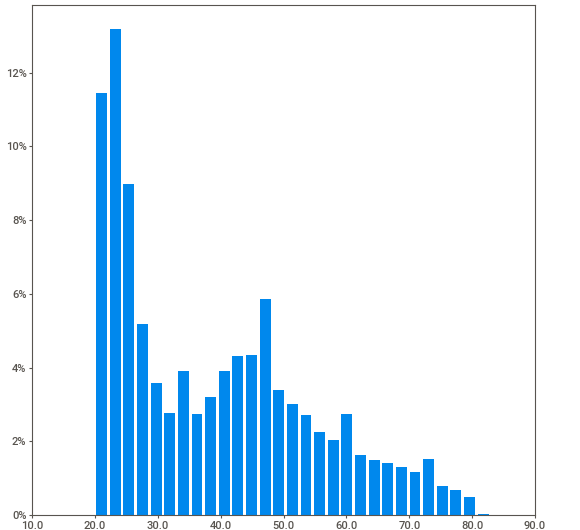
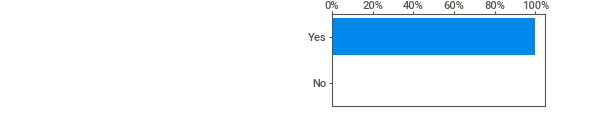
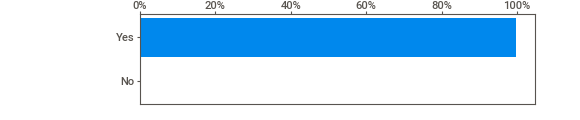
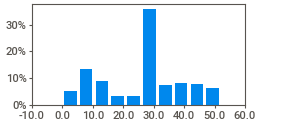
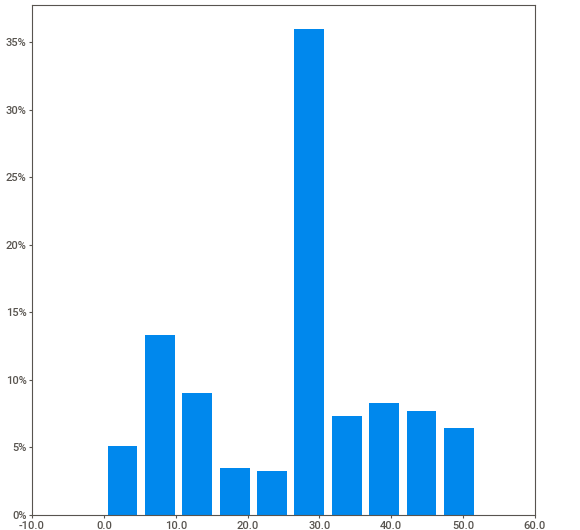
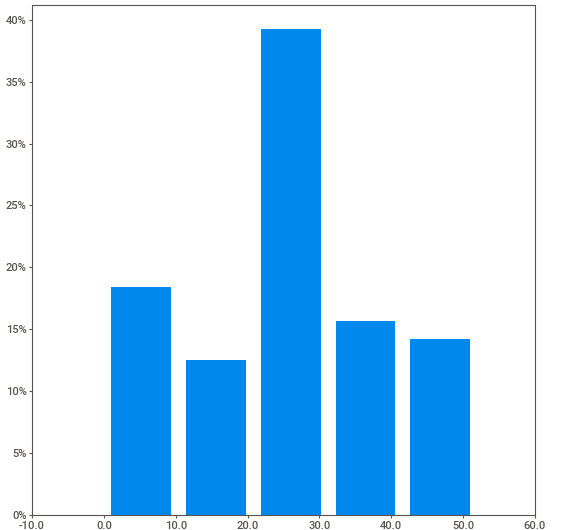
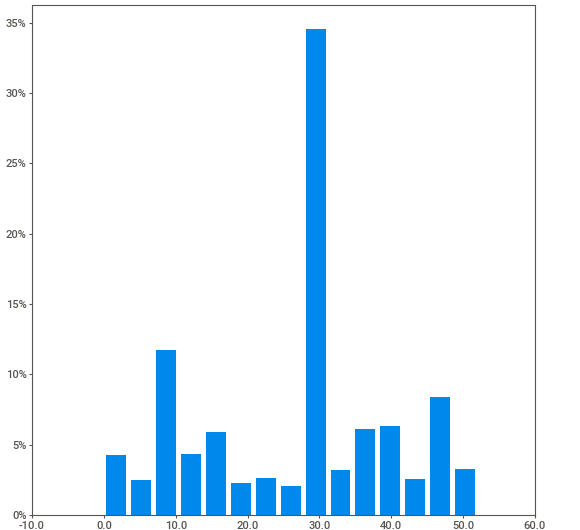
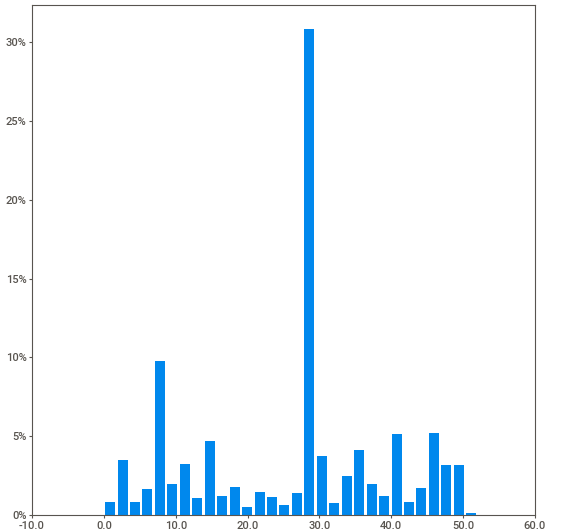
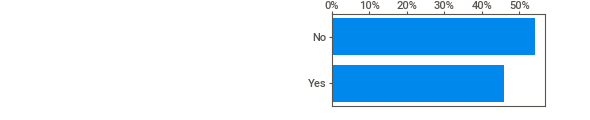
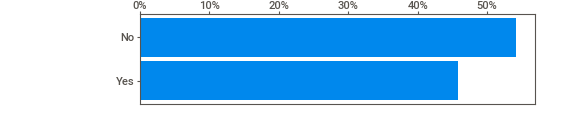
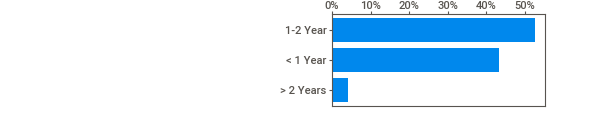
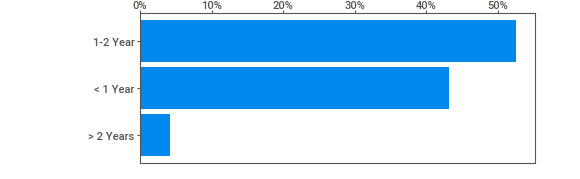
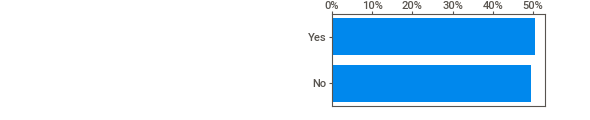
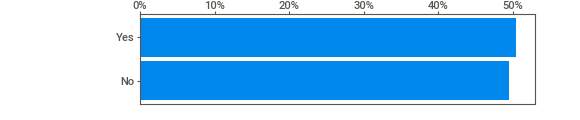
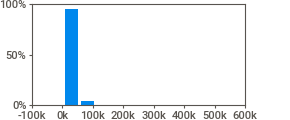
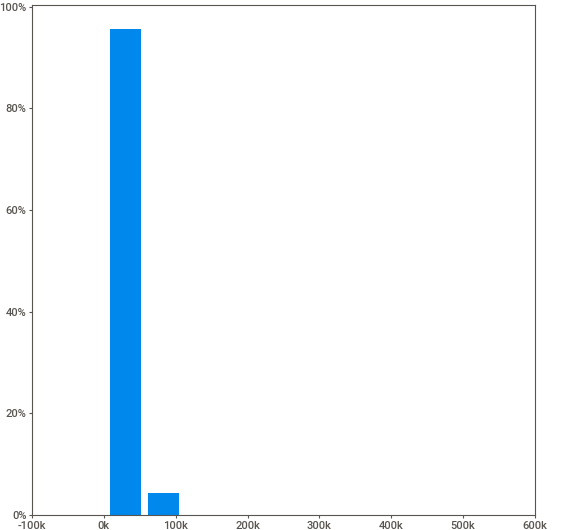
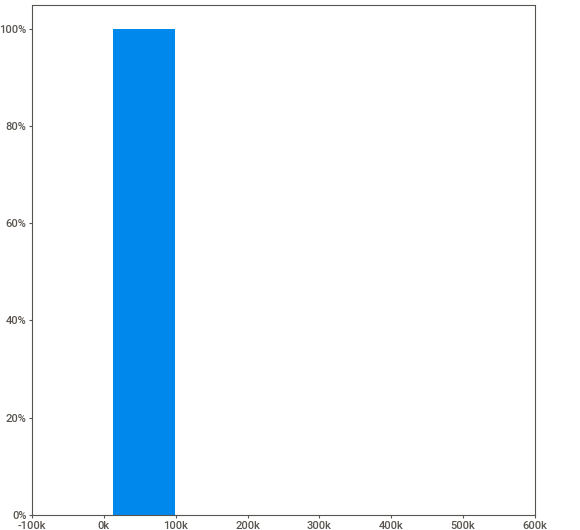
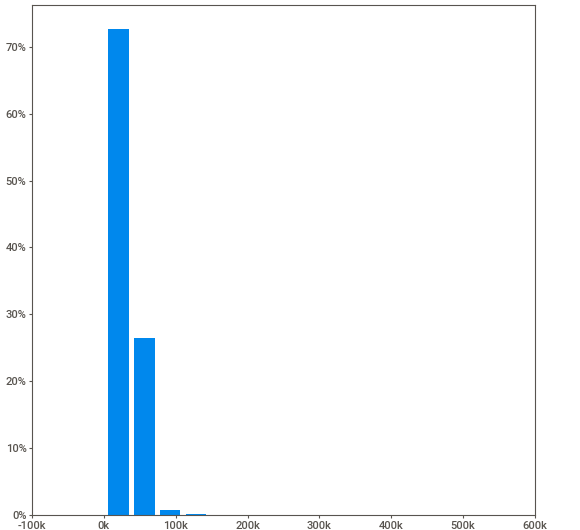
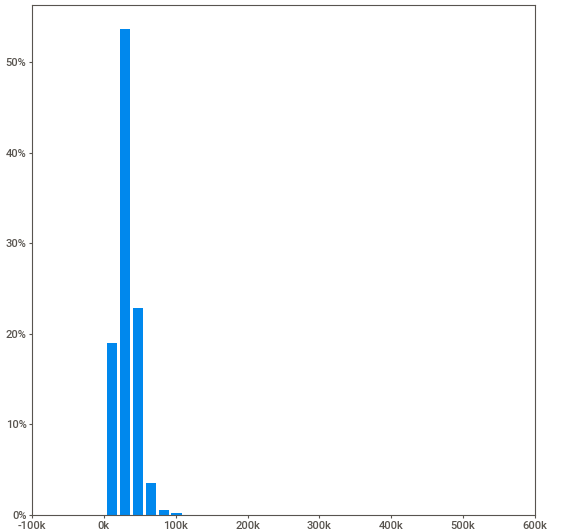
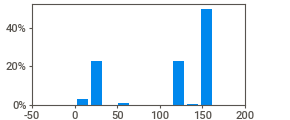
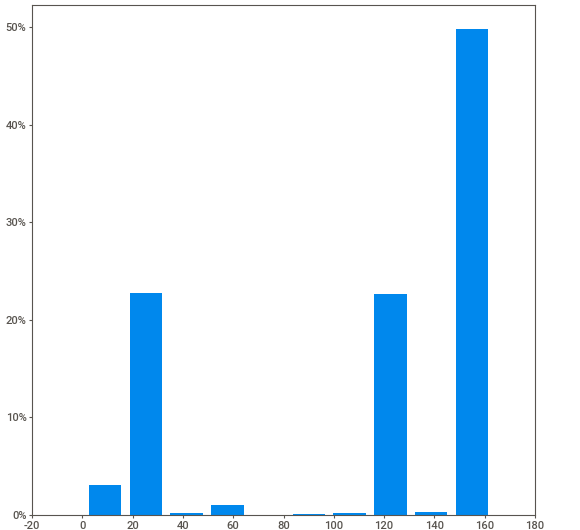
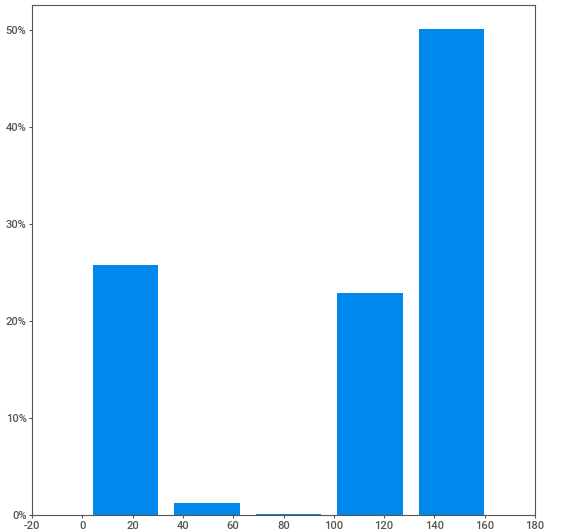
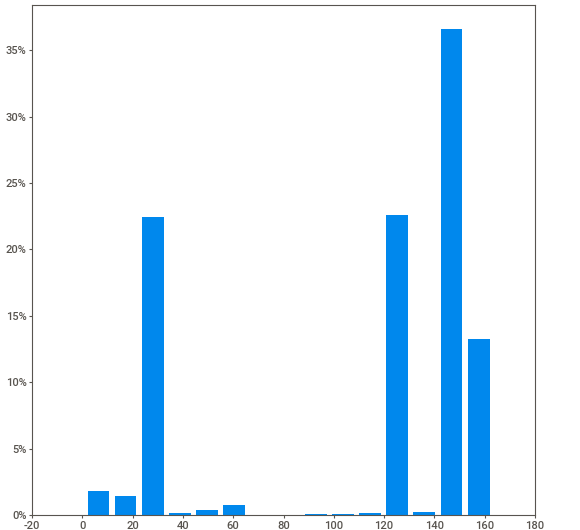
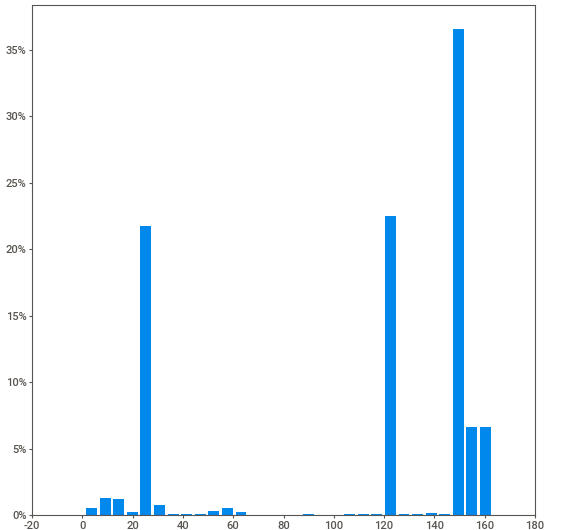
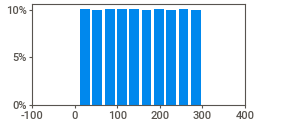
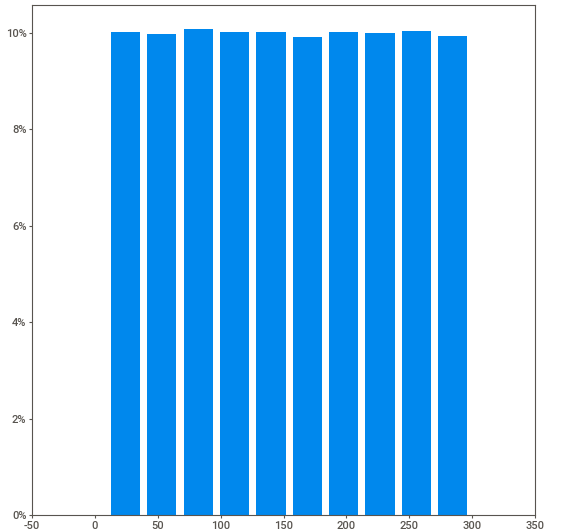
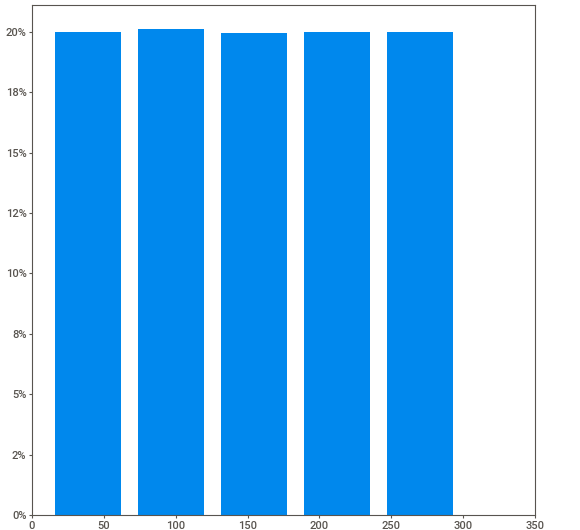
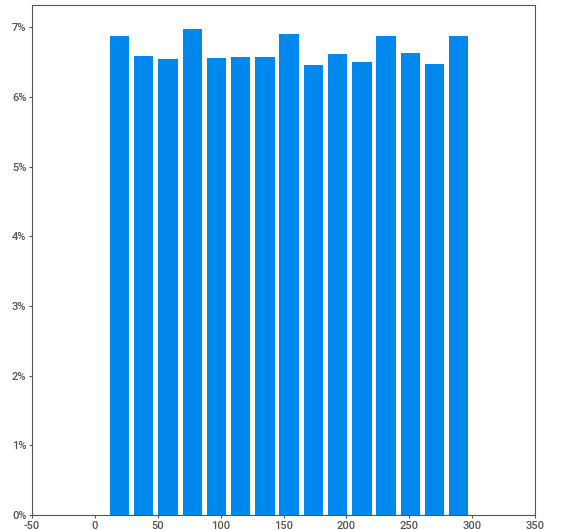
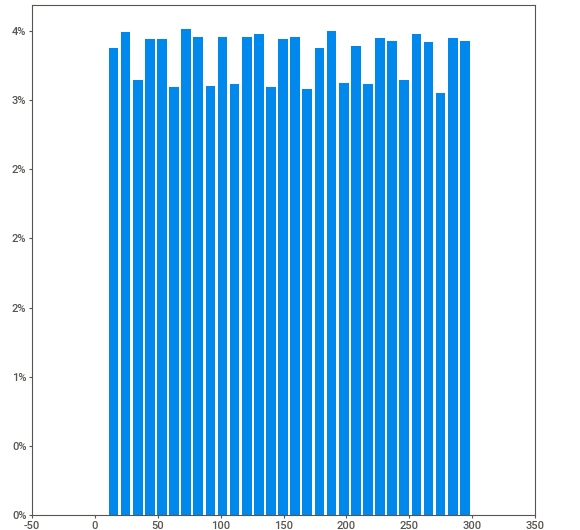
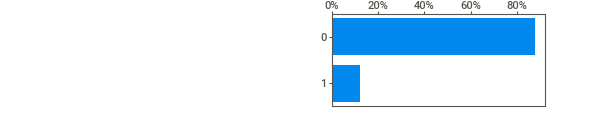
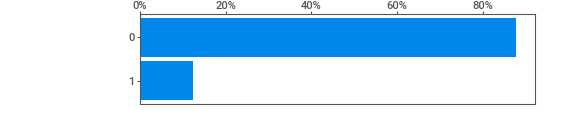
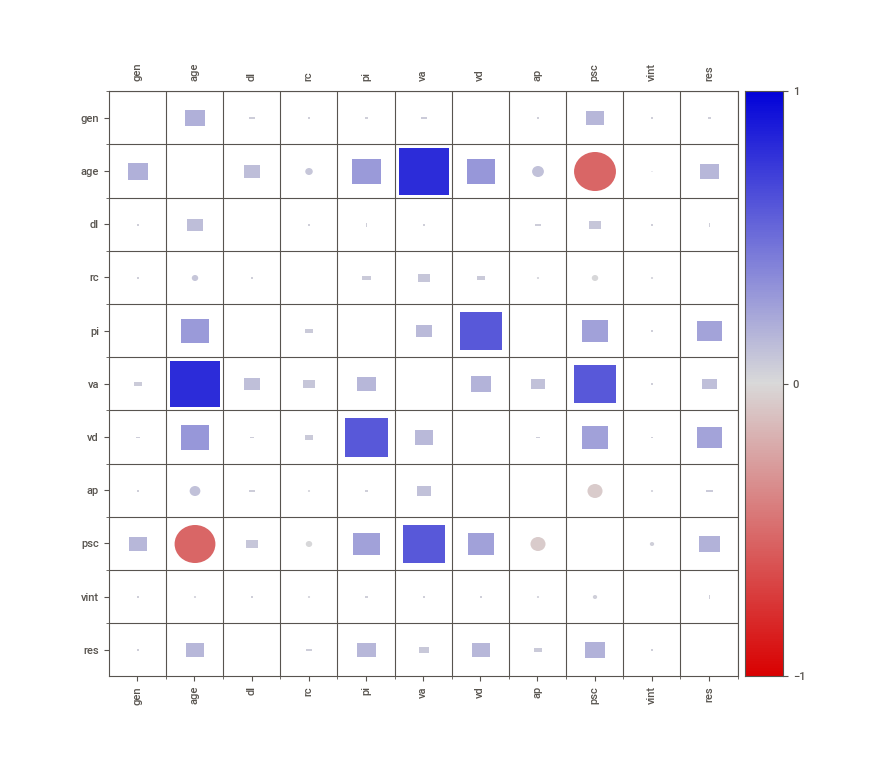
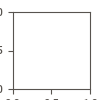

In [ ]:
rep.show_html('rep.html') # Saving the report to an HTML file.

rep.show_notebook()       # Display the report in a Jupyter Notebook.

* ***Gender is showing positive correlation of 15 % with age and 11 % with policy sales channel.***

* ***Age is showing positive correlation of :-***
  *   **79 % with Vehicle Age.**
  *   **27 % with Vehicle Damage.**
  *   **25 % with Previously Insured.**
  *   **15 % with Gender.**
  *   **11 % with Response.**

* ***Previously Insured is showing positive correlation of :-***
  * **57 % with Vehicle Damage.**
  * **21 % with Response.**
  * **25 % % with Age.**
  * **22 % with Policy Sales Channel.**

* ***Vehicle Age is showing positive correlation of :-***
  * **79 % with Age.**
  * **57 % with Policy Sales Channel.**
  * **13 % with Vehicle Damage.**
  * **12 % with Previously Insured.**

* ***Vehicle Damage is showing positive correlation of :-***
  * **27 % with Age.**
  * **11 % with Vehicle Age.**
  * **21 % with Response.**
  * **58 % with Previously Insured.**

* ***Policy Sales Channel is showing positive correlation of :-***
  * **57 % with Vehicle Age.**
  * **22 % with Vehicle Damage.**
  * **14 % with Response.**
  * **22 % with Previously Insured.**

* ***RESPONSE is showing positive correlation of :-***
  * **3 % with Vehicle Age.**
  * **11 % with Vehicle Damage.**
  * **12 % with Previously Insured.**
  * **0 % with Driving License.**
  * **0 % with Gender.**
  * **14 %  with Policy Sales Channel.**
  * **11 % with Age.**
  * **2 % with Annual Premium.**

### **Correlation Heatmap**

**What is a correlation heatmap?**

* ***We can define a heatmap as a visual representation of the correlation between all the variables present in the data frame.***

* ***To represent this, it uses a system of colour palettes ranging from light to dark, demonstrating low to high positive or negative correlation.***

* ***It is helpful in showing correlation between numerical features.***

<Axes: >

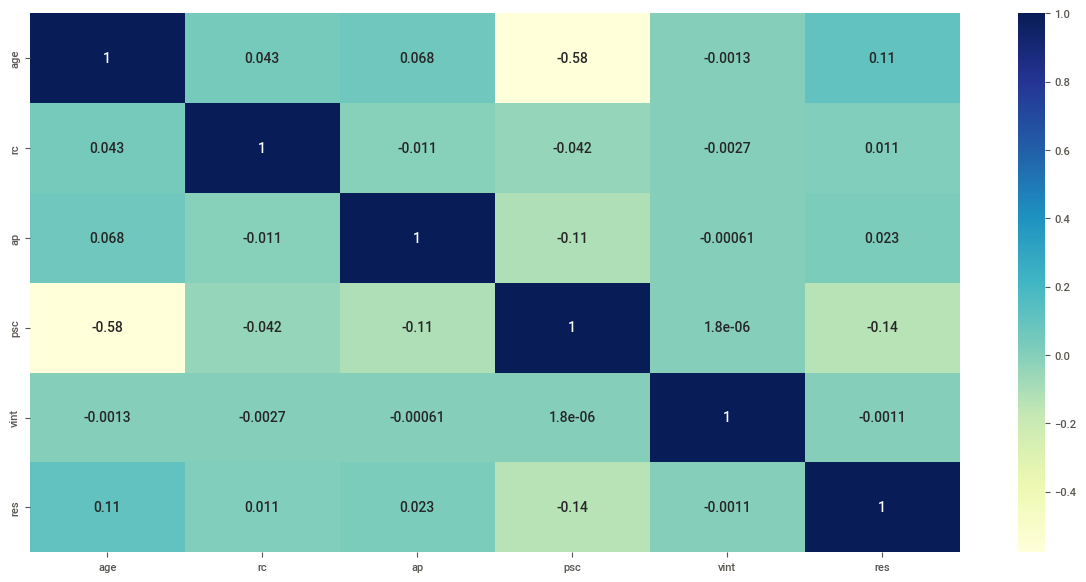

In [ ]:
# Correlation heatmap of our dataset.

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot = True)

* ***AGE is strongly negatively correlated with POLICY SALES CHANNEL.***

#**Hypothesis Testing**

**What is Hypothesis testing?**

* ***We can define hypothesis testing as a method of statistical inference which is used to determine if the evidence at hand sufficiently supports a given hypothesis. Hypothesis testing enables us to make probabilistic assumptions regarding population parameters.***

* ***At first, we have to assume few hypothetical statements upon which we could perform hypothesis testing.***

* ***Let's assume these three statements :***

 * **The average yearly rate for auto insurance is more than 15,000.**

 *  **The average consumer is over 29 years old.**

 * **The yearly premium standard deviation is 15,000.**


 * **Formula to calculate hypothesis testing
 Z = ( x̅ – μ0 ) / (σ /√n),**

  **Here, x̅ is the sample mean,
 μ0 is the population mean,
 σ is the standard deviation,
 n is the sample size.**

###**Hypothetical Statement 1**

**This is our research hypothesis :**

* "**The average yearly rate for auto insurance is more than 15,000.**"

* **Null Hypothesis ($H_0$) : Average annual premium ¬> 15,000**

* **Alternate Hypothesis ($H_a$) : Average annual premium > 15,000**

In [ ]:
# Performing appropriate statistical test for p-value.

hs = df['ap'].sample(600)     # Randomly taking sample of 600 data points.
hm = hs.mean()                # Calculating mean of those sampled data points.
hs = hs.std()                 # Calculating standard deviation of those sampled data points.

In [ ]:
# Implementing hypothesis testing formula.

tf = (hm-15000)/(hs/(np.sqrt(600)))
tf

24.367512420906472

In [ ]:
# Calculating probability.

from scipy.stats import norm
pro_z = norm.cdf(21.22, 0, 1)
print(pro_z)

1.0


In [ ]:
# Calculating P-Value

p1 = 1-pro_z
p1

0.0

* **To get the p-value, we used the Z-test**.

* **We have enough data to reject $H_0$ because the likelihood we obtained is close to 100%. As a result, the average yearly rate for auto insurance is more than 15,000.**

###**Hypothetical Statement 2**

**This is our research hypothesis :**

* "**The average consumer is over 29 years old.**"

* **Null Hypothesis ($H_0$) : Average age ¬> 29**

* **Alternate Hypothesis ($H_a$) : Average age > 29**

In [ ]:
# Performing appropriate statistical test for p-value.

hs = df['age'].sample(600)    # Randomly taking sample of 600 data points.
hm = hs.mean()                # Calculating mean of those sampled data points.
hs = hs.std()                 # Calculating standard deviation of those sampled data points.

In [ ]:
# Implementing hypothesis testing formula.

tf = (hm-29)/(hs/(np.sqrt(600)))
tf

16.31244233394089

In [ ]:
# Calculating probability.

from scipy.stats import norm
pro_z = norm.cdf(16.47, 0, 1)
print(pro_z)

1.0


In [ ]:
# Calculating P-Value

p1 = 1-pro_z
p1

0.0

* **To get the p-value, we used the Z-test**.

* **We have enough data to reject $H_0$ because the likelihood we obtained is close to 100%. As a result, the average consumer is over 29 years old.**

###**Hypothetical Statement 3**

**This is our research hypothesis :**

* "**The yearly premium standard deviation is 15,000.**"

* **Null Hypothesis ($H_0$) : Standard deviation ¬> 15,000**

* **Alternate Hypothesis ($H_a$) : Standard deviation > 15,000**

In [ ]:
# Performing appropriate statistical test for p-value.

hum = df['ap'].sample(90)    # Randomly taking sample of 90 data points.
hs = (np.std(hum))**2

In [ ]:
# Computing test statistic.

ts = (49 * hs)/(15000*15000)
ts

57.80922304515172

In [ ]:
# Calculating probability.

from scipy.stats import chi2
prob = chi2.cdf(135.69,49)
print(prob)

0.9999999995476738


* **To get the p-value, we used the Chi2-test.**

* **We picked the Chi2-test to calculate the p-value since we are doing hypothesis testing for standard deviation. We have enough data to reject $H_0$ based on the likelihood we obtained of 99%. As a result, the yearly premium standard deviation is 15,000.**

#**Feature Engineering and Data-preprocessing**

##**Data Transformation and Handling Outliers**

* ***It's necessary to get rid of all the outliers in our input features to get a model with better accuracy and precision.***

* ***There are no outliers present in our input numerical features excluding 'Annual Premium', so we are removing outliers from this feature by plotting it in a boxplot and applying trimming for removing outliers.***

Text(0.5, 0, 'Annual Premium')

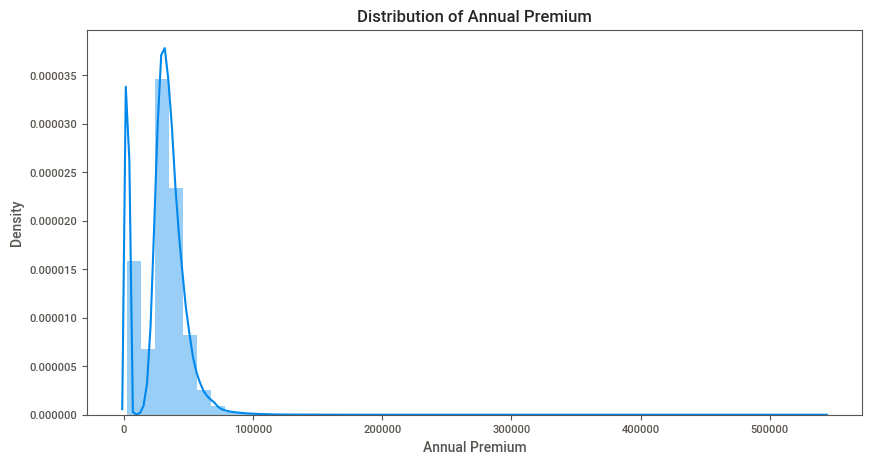

In [ ]:
# Plotting distribution plot for this feature.

plt.figure(figsize=(10,5))
sns.distplot(df['ap'])
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')

* ***Our feature is showing extreme right skewness that indicates the presense of outliers.***

Text(0.5, 1.0, 'Checking outliers in Annual Premium column')

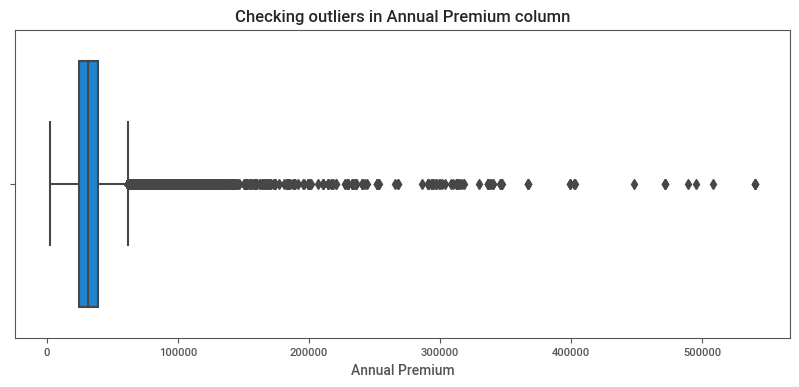

In [ ]:
# Plotting a boxplot to identify outliers.

plt.figure(figsize=(10,4))
sns.boxplot(x=df['ap'])
plt.xlabel('Annual Premium')
plt.title('Checking outliers in Annual Premium column')

* ***As, we can see there are outliers present in this input feature.***

* ***We are performing trimming on this feature to remove outliers.***

**What is Trimming ?**

* ***It involves removing extreme values by setting a predefined threshold. Any data point above or below the threshold is trimmed or set to a specific value.***

In [ ]:
# Finding IQR.

per25 = df['ap'].quantile(0.25)     # Calculating 25th percentile.
per75 = df['ap'].quantile(0.75)     # Calculating 75th percentile.
iqr   = per75 - per25               # Calculating Interquartile Range.
upli  = per75 + 1.25 * iqr          # Calculating Upper Limit.
lowli = per25 - 1.25 * iqr          # Calculating Lower Limit.

In [ ]:
# Implementing Capping.

df['ap'] = np.where (
    df[ 'ap' ] > upli , upli ,                              # Setting threshold for upper limit.
    np.where ( df[ 'ap' ] < lowli , lowli , df[ 'ap' ] )    # Setting threshold for lower limit.
    )

Text(0.5, 1.0, 'Checking outliers in Annual Premium column')

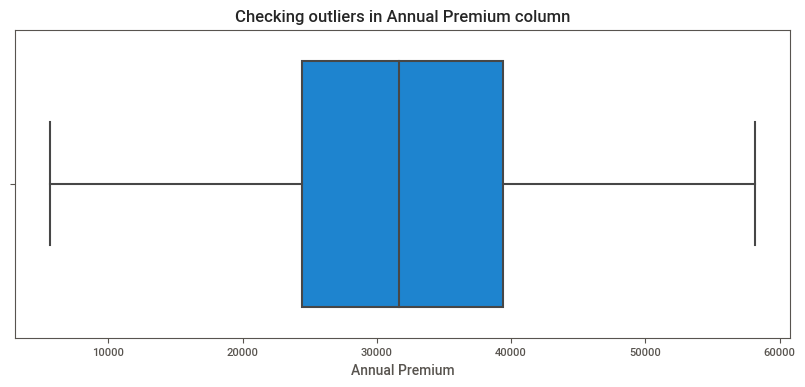

In [ ]:
# Plotting a boxplot to identify outliers.

plt.figure(figsize=(10,4))
sns.boxplot(x=df['ap'])
plt.xlabel('Annual Premium')
plt.title('Checking outliers in Annual Premium column')

* ***After applying trimming, we can see that there are no more outliers present in our dataframe.***

Text(0.5, 0, 'Annual Premium')

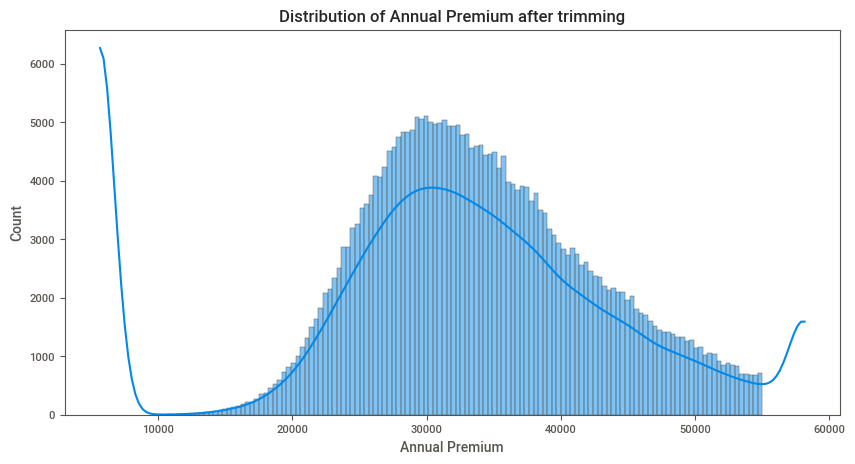

In [ ]:
# Plotting a histogram after trimming outliers.

plt.figure(figsize=(10,5))
sns.histplot(df['ap'],binrange=(10000, 55000),kde = True)
plt.title('Distribution of Annual Premium after trimming')
plt.xlabel('Annual Premium')

* ***The distribution of this feature is now near normal after applying trimming.***

##**Feature engineering**

###**Checking multicollinearity using VIF**

* ***The VIF (Variance Inflation Factor) value for a single predictor variable represents the degree of multicollinearity between that predictor variable and all the other predictor variables in the model.***

* ***Higher VIF values indicate stronger multicollinearity, suggesting a higher correlation between the predictor variable and the other variables in the model.***

In [ ]:
# Importing  VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining a function to calculate VIF.

def calc_vif(X):

    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
# Calling function on our numerical variables.

calc_vif(numf)

Variables       VIF
0       age  5.142026
1        rc  4.449898
2        ap  3.742030
3       psc  3.632367
4      vint  3.998082
5       res  1.156917

* ***As we are getting VIF values in a range from 1 to 5, that means that there's no correlation between our independent numerical variables.***

###**One hot encoding**

**What is one hot encoding?**

* ***It is a technique that is used in machine learning models to represent categorical variables in the form of numerical values.***

In [ ]:
# To display all columns in the output.

pd.set_option('display.max_columns', None)

In [ ]:
# Performig one hot encoding on the dataset.

df = pd.get_dummies(df,drop_first = True, sparse = True)  # drop_first = True, it drops the first encoded column for each categorical variable is dropped from the DataFrame.
df.head()

age  rc       ap  psc  vint  res  gen_Male  dl_Yes  pi_Yes  va_< 1 Year  \
0   44  28  40454.0   26   217    1         1       1       0            0   
1   76   3  33536.0   26   183    0         1       1       0            0   
2   47  28  38294.0   26    27    1         1       1       0            0   
3   21  11  28619.0  152   203    0         1       1       1            1   
4   29  41  27496.0  152    39    0         0       1       1            1   

   va_> 2 Years  vd_Yes  
0             1       1  
1             0       0  
2             1       1  
3             0       0  
4             0       0

In [ ]:
# Checking new columns after one hot encoding.

df.columns

Index(['age', 'rc', 'ap', 'psc', 'vint', 'res', 'gen_Male', 'dl_Yes', 'pi_Yes',
       'va_< 1 Year', 'va_> 2 Years', 'vd_Yes'],
      dtype='object')

* ***As providing vehicle insurance to those customers without a DL makes no sense, we are dropping the column 'dl_Yes' to make sure that insurance shouldn't be provided to those with no DL.***

In [ ]:
# Dropping this column.

df.drop(columns = ['dl_Yes'], axis=1, inplace = True)

In [ ]:
# Checking dataframe after dropping column.

df.head()

age  rc       ap  psc  vint  res  gen_Male  pi_Yes  va_< 1 Year  \
0   44  28  40454.0   26   217    1         1       0            0   
1   76   3  33536.0   26   183    0         1       0            0   
2   47  28  38294.0   26    27    1         1       0            0   
3   21  11  28619.0  152   203    0         1       1            1   
4   29  41  27496.0  152    39    0         0       1            1   

   va_> 2 Years  vd_Yes  
0             1       1  
1             0       0  
2             1       1  
3             0       0  
4             0       0

* ***'dl_Yes' column has been dropped.***

###**Handling Imbalanced Dataset using SMOTE**

Text(0.5, 1.0, 'Before applying SMOTE')

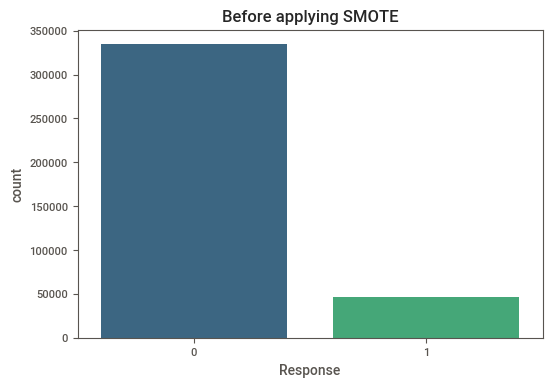

In [ ]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['res'],palette='viridis')
plt.xlabel('Response')
plt.title('Before applying SMOTE')

* ***Our dataset is highly imbalanced, as we can see by the above plot of the difference in numbers between the two responses.***

In [ ]:
# Printing the total numbers of each category.

df['res'].value_counts()

0    334399
1     46710
Name: res, dtype: int64

* ***There are 3,34,399 values for 0, whereas there are only 46,710 for 1.***

* ***This difference in numbers can cause bias towards one output, so we are using SMOTE to handle this imbalanced dataset.***

**What is SMOTE ?**

* ***SMOTE (Synthetic Minority Over-sampling Technique) is a popular algorithm used for oversampling the minority class in imbalanced datasets.***

* ***This can improve the performance of machine learning models by providing more balanced training data.***

In [ ]:
# Defining x and y variables for SMOTE.

x = df.drop(['res'], axis = 1)     # All columns excluding last one.

y = df['res']                      # Our target feature.

In [ ]:
# Implementing SMOTE.

smote = SMOTE()                                        # Creating an object for SMOTE technique.
xsmote, ysmote = smote.fit_resample(x,y)       # Applying SMOTE on x and y while storing output in xsmote and ysmote.

print('Original dataset shape :', len(df))
print('Resampled dataset shape :', len(ysmote))

Original dataset shape : 381109
Resampled dataset shape : 668798


Text(0.5, 1.0, 'After applying SMOTE')

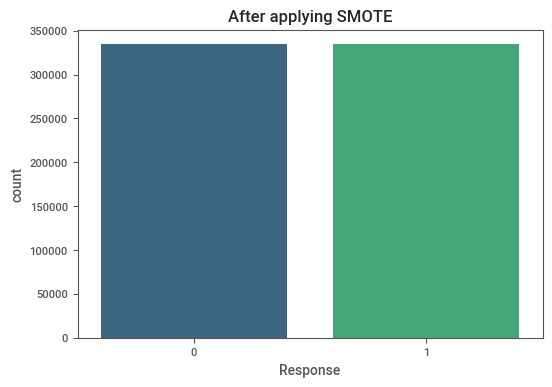

In [ ]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=ysmote,palette='viridis')
plt.xlabel('Response')
plt.title('After applying SMOTE')

* ***We can see a huge difference in values before and after applying SMOTE.***

* ***Now both entries have the same number of values.***

In [ ]:
# After and before comparisons in value after SMOTE implementation.

print('Before applying SMOTE :')
print(y.value_counts())
print("\n")
print('After  applying SMOTE :')
print(ysmote.value_counts())

Before applying SMOTE :
0    334399
1     46710
Name: res, dtype: int64


After  applying SMOTE :
1    334399
0    334399
Name: res, dtype: int64


* ***Before applying SMOTE, there were 46,710 entries for 1, whereas after applying SMOTE, there are now 3,34,399 values for both 1 and 0. Hence, a balanced dataset.***

#**Model Training**

##**Train Test Split**

**What is a train - test split ?**

* ***Before feeding the data into a machine learning algorithm, it is preferred that a train-test split be performed, which divides the whole dataset into two parts: training data and testing data. While training data is used to train the model, testing data is used to check how accurately the model is performing and if it requires further tuning or not.***

* ***We are taking a ratio of 80:20, i.e., 80% of training data and 20% of testing data.***

In [ ]:
# Creating train test split.

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xsmote,ysmote,test_size=.2,random_state=42)

print(xtrain.shape)
print(xtest.shape)

(535038, 10)
(133760, 10)


* ***There are 5,35,038 rows and 15 columns in our training dataset, whereas there are 1,33,760 rows and 15 columns in our testing dataset, as we took a ratio of 80:20 for our training and testing sets.***

##**Data Scaling**

**Using Standardization for Scaling**

* ***StandardScaler is a preprocessing technique used to standardize the features of a dataset. It transforms the data such that each feature has a mean of 0 and a standard deviation of 1.***

* ***It helps to scale the features to a consistent range, which can improve the performance and stability of many machine learning algorithms.***

In [ ]:
# Standardizing dataset.

std = StandardScaler()

xtrain = std.fit_transform(xtrain)
xtest = std.transform(xtest)

In [ ]:
# Checking if the dataset has been standardized or not.

pd.DataFrame(xtrain)

0         1         2         3         4         5         6  \
0       2.134772  0.128370  1.221799  0.339899 -0.419472 -0.941252 -0.594108   
1       0.322298  1.621152  0.028474 -1.312100 -1.175583 -0.941252  1.683195   
2      -0.910184 -0.203359 -0.498949  0.878595  1.080749  1.062415 -0.594108   
3      -0.330192  1.123558  0.018794  0.375812 -0.503484 -0.941252 -0.594108   
4       0.684793  0.625964 -0.068858  0.375812  0.468659  1.062415  1.683195   
...          ...       ...       ...       ...       ...       ...       ...   
535033 -1.417677  0.377167 -0.399215  0.878595  1.512812  1.062415 -0.594108   
535034 -1.200180  0.791829 -0.568795  0.878595  1.596825 -0.941252  1.683195   
535035  1.119787  0.708896  0.705705  0.375812  1.728844  1.062415 -0.594108   
535036 -1.345178 -2.027870 -0.822033  0.878595 -0.935548 -0.941252 -0.594108   
535037 -0.982683  0.874761 -0.421266  0.878595 -0.323458 -0.941252 -0.594108   

               7         8         9  
0      -0.609850 -0.178828  0.653249  
1      -0.609850 -0.178828  0.653249  
2       1.639748 -0.178828  0.653249  
3      -0.609850 -0.178828  0.653249  
4      -0.609850 -0.178828 -1.530811  
...          ...       ...       ...  
535033  1.639748 -0.178828 -1.530811  
535034  1.639748 -0.178828 -1.530811  
535035 -0.609850 -0.178828  0.653249  
535036  1.639748 -0.178828  0.653249  
535037  1.639748 -0.178828  0.653249  

[535038 rows x 10 columns]

##**ML Model Implementation**

###**Logistic Regression**

####**Fitting the model**

**What is logistic regression?**

* **A brief idea about logistic regression :**

* ***Logistic regression is a common Machine Learning method that belongs to the Supervised Learning approach. It is used to forecast the categorical dependent variable given a collection of independent factors.***

* ***Logistic regression forecasts the outcome of a categorical dependent variable. As a result, the conclusion must be a categorical or discrete value. It can be Yes or No, 0 or 1, true or False, etc., but instead of presenting the precise values like 0 and 1, it delivers the probability values that fall between 0 and 1.***

* ***Instead of constructing a regression line, we fit a "S" shaped logistic function, which predicts one of two maximum values (0 or 1).***

In [ ]:
# Creating an object of this model and fitting training data.

lr = LogisticRegression()

lr.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
# Using this model on our testing data to predict responses.

ypred = pd.DataFrame(lr.predict(xtest))
ypred

0
0       1
1       1
2       0
3       1
4       1
...    ..
133755  1
133756  0
133757  0
133758  1
133759  0

[133760 rows x 1 columns]

In [ ]:
# Predicting probabilities for testing set for both responses.

ypp = pd.DataFrame(lr.predict_proba(xtest)[: , 1])    # Predicting probabilities only for positive class.

####**Evaluation Metrics**

In [ ]:
# Confusion Matrix

c = confusion_matrix(ytest,ypred)

print('Confusion Matrix   :\n',c)

Confusion Matrix   :
 [[48848 17927]
 [ 7182 59803]]


Text(0.5, 1.0, 'Confusion Matrix')

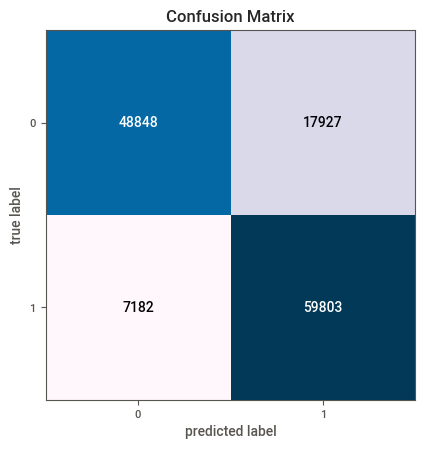

In [ ]:
# Plotting confusion matrix for this model.

fig, ax = plot_confusion_matrix(c, cmap = 'PuBu')
plt.title('Confusion Matrix')

In [ ]:
# Checking various evaluation metrics.

ac = accuracy_score(ytest,ypred)
print('Accuracy Score  :',ac)

ps = precision_score(ytest,ypred)
print('Precision Score :',ps)

rs = recall_score(ytest,ypred)
print('Recall Score    :',rs)

fs = f1_score(ytest,ypred)
print('F1 Score        :',fs)

Accuracy Score  : 0.8122831937799043
Precision Score : 0.7693683262575582
Recall Score    : 0.892781966111816
F1 Score        : 0.8264934526483088


* ***We are getting an Accuracy Score of 81% for this model.***

* ***We are getting an F1 Score (Harmonic mean of Precision and Recall score) of 83% for this model.***


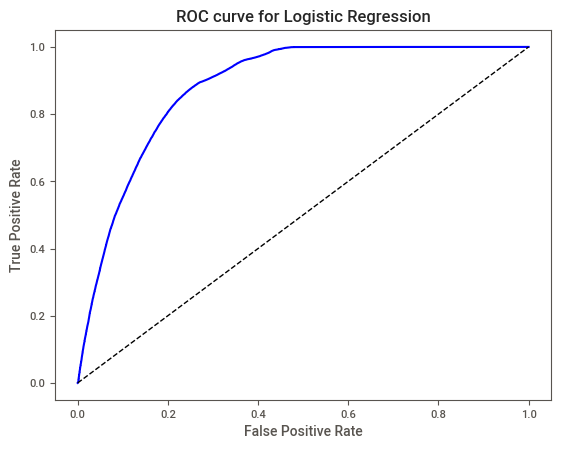

In [ ]:
# Plotting Roc curve.

fpr, tpr, _ = roc_curve(ytest,ypp)
plt.plot(fpr, tpr, color = 'b')
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1), linestyle = "--", color = 'black', lw = 1)

* ***Upper half diagonal represent True Positive Rate or how efficiently this model is identifying positive instances i.e. 1.***

* ***Lower half diagonal represent False Positive Rate or how inefficiently this model is identifying positive instances i.e. 1.***

In [ ]:
# Calculating Roc Auc Score for this model.

roc = roc_auc_score(ytest,ypred)
print('Roc Auc Score   :',roc)

Roc Auc Score   : 0.812156613905777


* ***We are getting an Roc Auc Score ( Ability of the model to distinguish between classes.) of 81% for this model.***

In [ ]:
# Storing these metrics in a dictionary.

dict1 = {'Model'           : 'Logistic Regression',
         'Accuracy Score'  : round((ac),2),
         'Precision Score' : round((ps),2),
         'Recall Score'    : round((rs),2),
         'F1 Score'        : round((fs),2),
         'Roc Auc Score'   : round((roc),2)}

In [ ]:
dict1

{'Model': 'Logistic Regression',
 'Accuracy Score': 0.81,
 'Precision Score': 0.77,
 'Recall Score': 0.89,
 'F1 Score': 0.83,
 'Roc Auc Score': 0.81}

In [ ]:
# Creating a new dataframe to store evaluation metrics values for later comparison.

cdf =  pd.DataFrame(dict1,index=[1])
cdf

Model  Accuracy Score  Precision Score  Recall Score  \
1  Logistic Regression            0.81             0.77          0.89   

   F1 Score  Roc Auc Score  
1      0.83           0.81

###**Decision Tree**

####**Fitting the model**

In [ ]:
# Creating an object of this model and fitting training data.

dtc = DecisionTreeClassifier(max_depth = 8, max_features = 10, max_leaf_nodes = 10,min_samples_split = 3, min_samples_leaf= 1)

dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=8, max_features=10, max_leaf_nodes=10,
                       min_samples_split=3)

In [ ]:
# Using this model on our testing data to predict responses.

ypred = pd.DataFrame(dtc.predict(xtest))
ypred

0
0       1
1       0
2       0
3       1
4       1
...    ..
133755  1
133756  0
133757  0
133758  1
133759  0

[133760 rows x 1 columns]

In [ ]:
# Predicting probabilities for testing set for both responses.

ypp = pd.DataFrame(dtc.predict_proba(xtest)[: , 1])    # Predicting probabilities only for positive class.

####**Evaluation Metrics**

In [ ]:
# Confusion Matrix

c = confusion_matrix(ytest,ypred)

print('Confusion Matrix   :\n',c)

Confusion Matrix   :
 [[51196 15579]
 [10284 56701]]


Text(0.5, 1.0, 'Confusion Matrix')

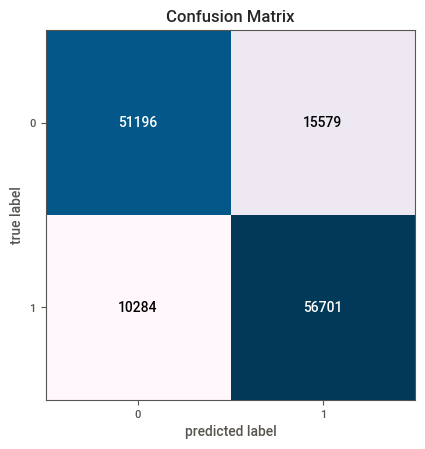

In [ ]:
# Plotting confusion matrix for this model.

fig, ax = plot_confusion_matrix(c, cmap = 'PuBu')
plt.title('Confusion Matrix')

In [ ]:
# Checking various evaluation metrics.

ac = accuracy_score(ytest,ypred)
print('Accuracy Score  :',ac)

ps = precision_score(ytest,ypred)
print('Precision Score :',ps)

rs = recall_score(ytest,ypred)
print('Recall Score    :',rs)

fs = f1_score(ytest,ypred)
print('F1 Score        :',fs)

Accuracy Score  : 0.8066462320574163
Precision Score : 0.7844631986718318
Recall Score    : 0.8464730909905203
F1 Score        : 0.8142893045632428


* ***We are getting an Accuracy Score of 81% for this model.***

* ***We are getting an F1 Score (Harmonic mean of Precision and Recall score) of 82% for this model.***

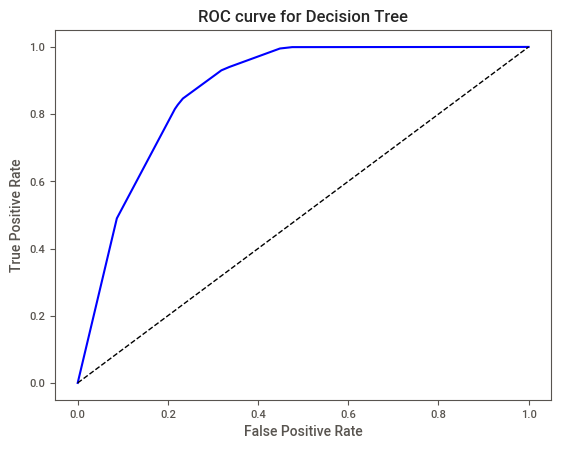

In [ ]:
# Plotting Roc curve.

fpr, tpr, _ = roc_curve(ytest,ypp)
plt.plot(fpr, tpr, color = 'b')
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1), linestyle = "--", color = 'black', lw = 1)

* ***Upper half diagonal represent True Positive Rate or how efficiently this model is identifying positive instances i.e. 1.***

* ***Lower half diagonal represent False Positive Rate or how inefficiently this model is identifying positive instances i.e. 1.***

In [ ]:
# Calculating Roc Auc Score for this model.

roc = roc_auc_score(ytest,ypred)
print('Roc Auc Score   :',roc)

Roc Auc Score   : 0.8065836065210932


* ***We are getting an Roc Auc Score ( Ability of the model to distinguish between classes.) of 81% for this model.***

In [ ]:
# Storing these metrics in a dictionary.

dict1 = {'Model'           : 'Decision Tree',
         'Accuracy Score'  : round((ac),2),
         'Precision Score' : round((ps),2),
         'Recall Score'    : round((rs),2),
         'F1 Score'        : round((fs),2),
         'Roc Auc Score'   : round((roc),2)}
dict1

{'Model': 'Decision Tree',
 'Accuracy Score': 0.81,
 'Precision Score': 0.78,
 'Recall Score': 0.85,
 'F1 Score': 0.81,
 'Roc Auc Score': 0.81}

In [ ]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model  Accuracy Score  Precision Score  Recall Score  \
0  Logistic Regression            0.81             0.77          0.89   
1        Decision Tree            0.81             0.78          0.85   

   F1 Score  Roc Auc Score  
0      0.83           0.81  
1      0.81           0.81

####**Cross-Validation & Hyperparameter Tuning**

**What are cross-validation and hyperparameter tuning ?**

* ***We can define "cross-validation" as a technique by which we can cross-validate our model by the process of cross-validation, in which a training set is divided into a number of folds, and among these one set is set as a testing set and the rest as a training set, and this process is repeated until all the folds are once tested as a testing set. In the end, the average accuracy of the folds is calculated.***

* ***Hyperparameter tuning can be defined as the process of tuning the parameters of the model to increase its performance and efficiency of the model.***

* ***These two techniques can either be applied through "grid search" or "random forest". We'll be using both of them in further analysis.***

#####**Decision Tree using RandomizedSearchCV**

In [ ]:
# Importing RandomizedSearchCV and fitting the training set for hyperparameter tuning and cross validation.

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth' : np.arange(30), 'max_features' : np.arange(20), 'max_leaf_nodes' : np.arange(50), 'min_samples_split' : np.arange(10), 'min_samples_leaf' : np.arange(10)}
dtcr = RandomizedSearchCV(dtc,param_grid,scoring='accuracy',cv=5,n_jobs = -1)
dtcr.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=8,
                                                    max_features=10,
                                                    max_leaf_nodes=10,
                                                    min_samples_split=3),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'max_features': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                                        'max_leaf_nodes': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='accuracy')

In [ ]:
# Storing best updated parameters after hyperparameter tuning.

x = dtcr.best_estimator_

In [ ]:
# Calculating probabilities for both classes.

ypp = pd.DataFrame(dtcr.predict_proba(xtest)[: , 1])    # Predicting probabilities only for positive class.

In [ ]:
# Testing updated decision tree model on testing set.

rarg = pd.DataFrame(dtcr.predict(xtest))
rarg

0
0       1
1       1
2       0
3       1
4       1
...    ..
133755  1
133756  0
133757  0
133758  1
133759  0

[133760 rows x 1 columns]

In [ ]:
# Calculating best parameters for our model by hyperparamter tuning.

print('Best parameter -',dtcr.best_params_)
print('Best score     -',dtcr.best_score_)
print('Best estimator -',dtcr.best_estimator_)

Best parameter - {'min_samples_split': 7, 'min_samples_leaf': 3, 'max_leaf_nodes': 44, 'max_features': 11, 'max_depth': 12}
Best score     - 0.8219640450587556
Best estimator - DecisionTreeClassifier(max_depth=12, max_features=11, max_leaf_nodes=44,
                       min_samples_leaf=3, min_samples_split=7)


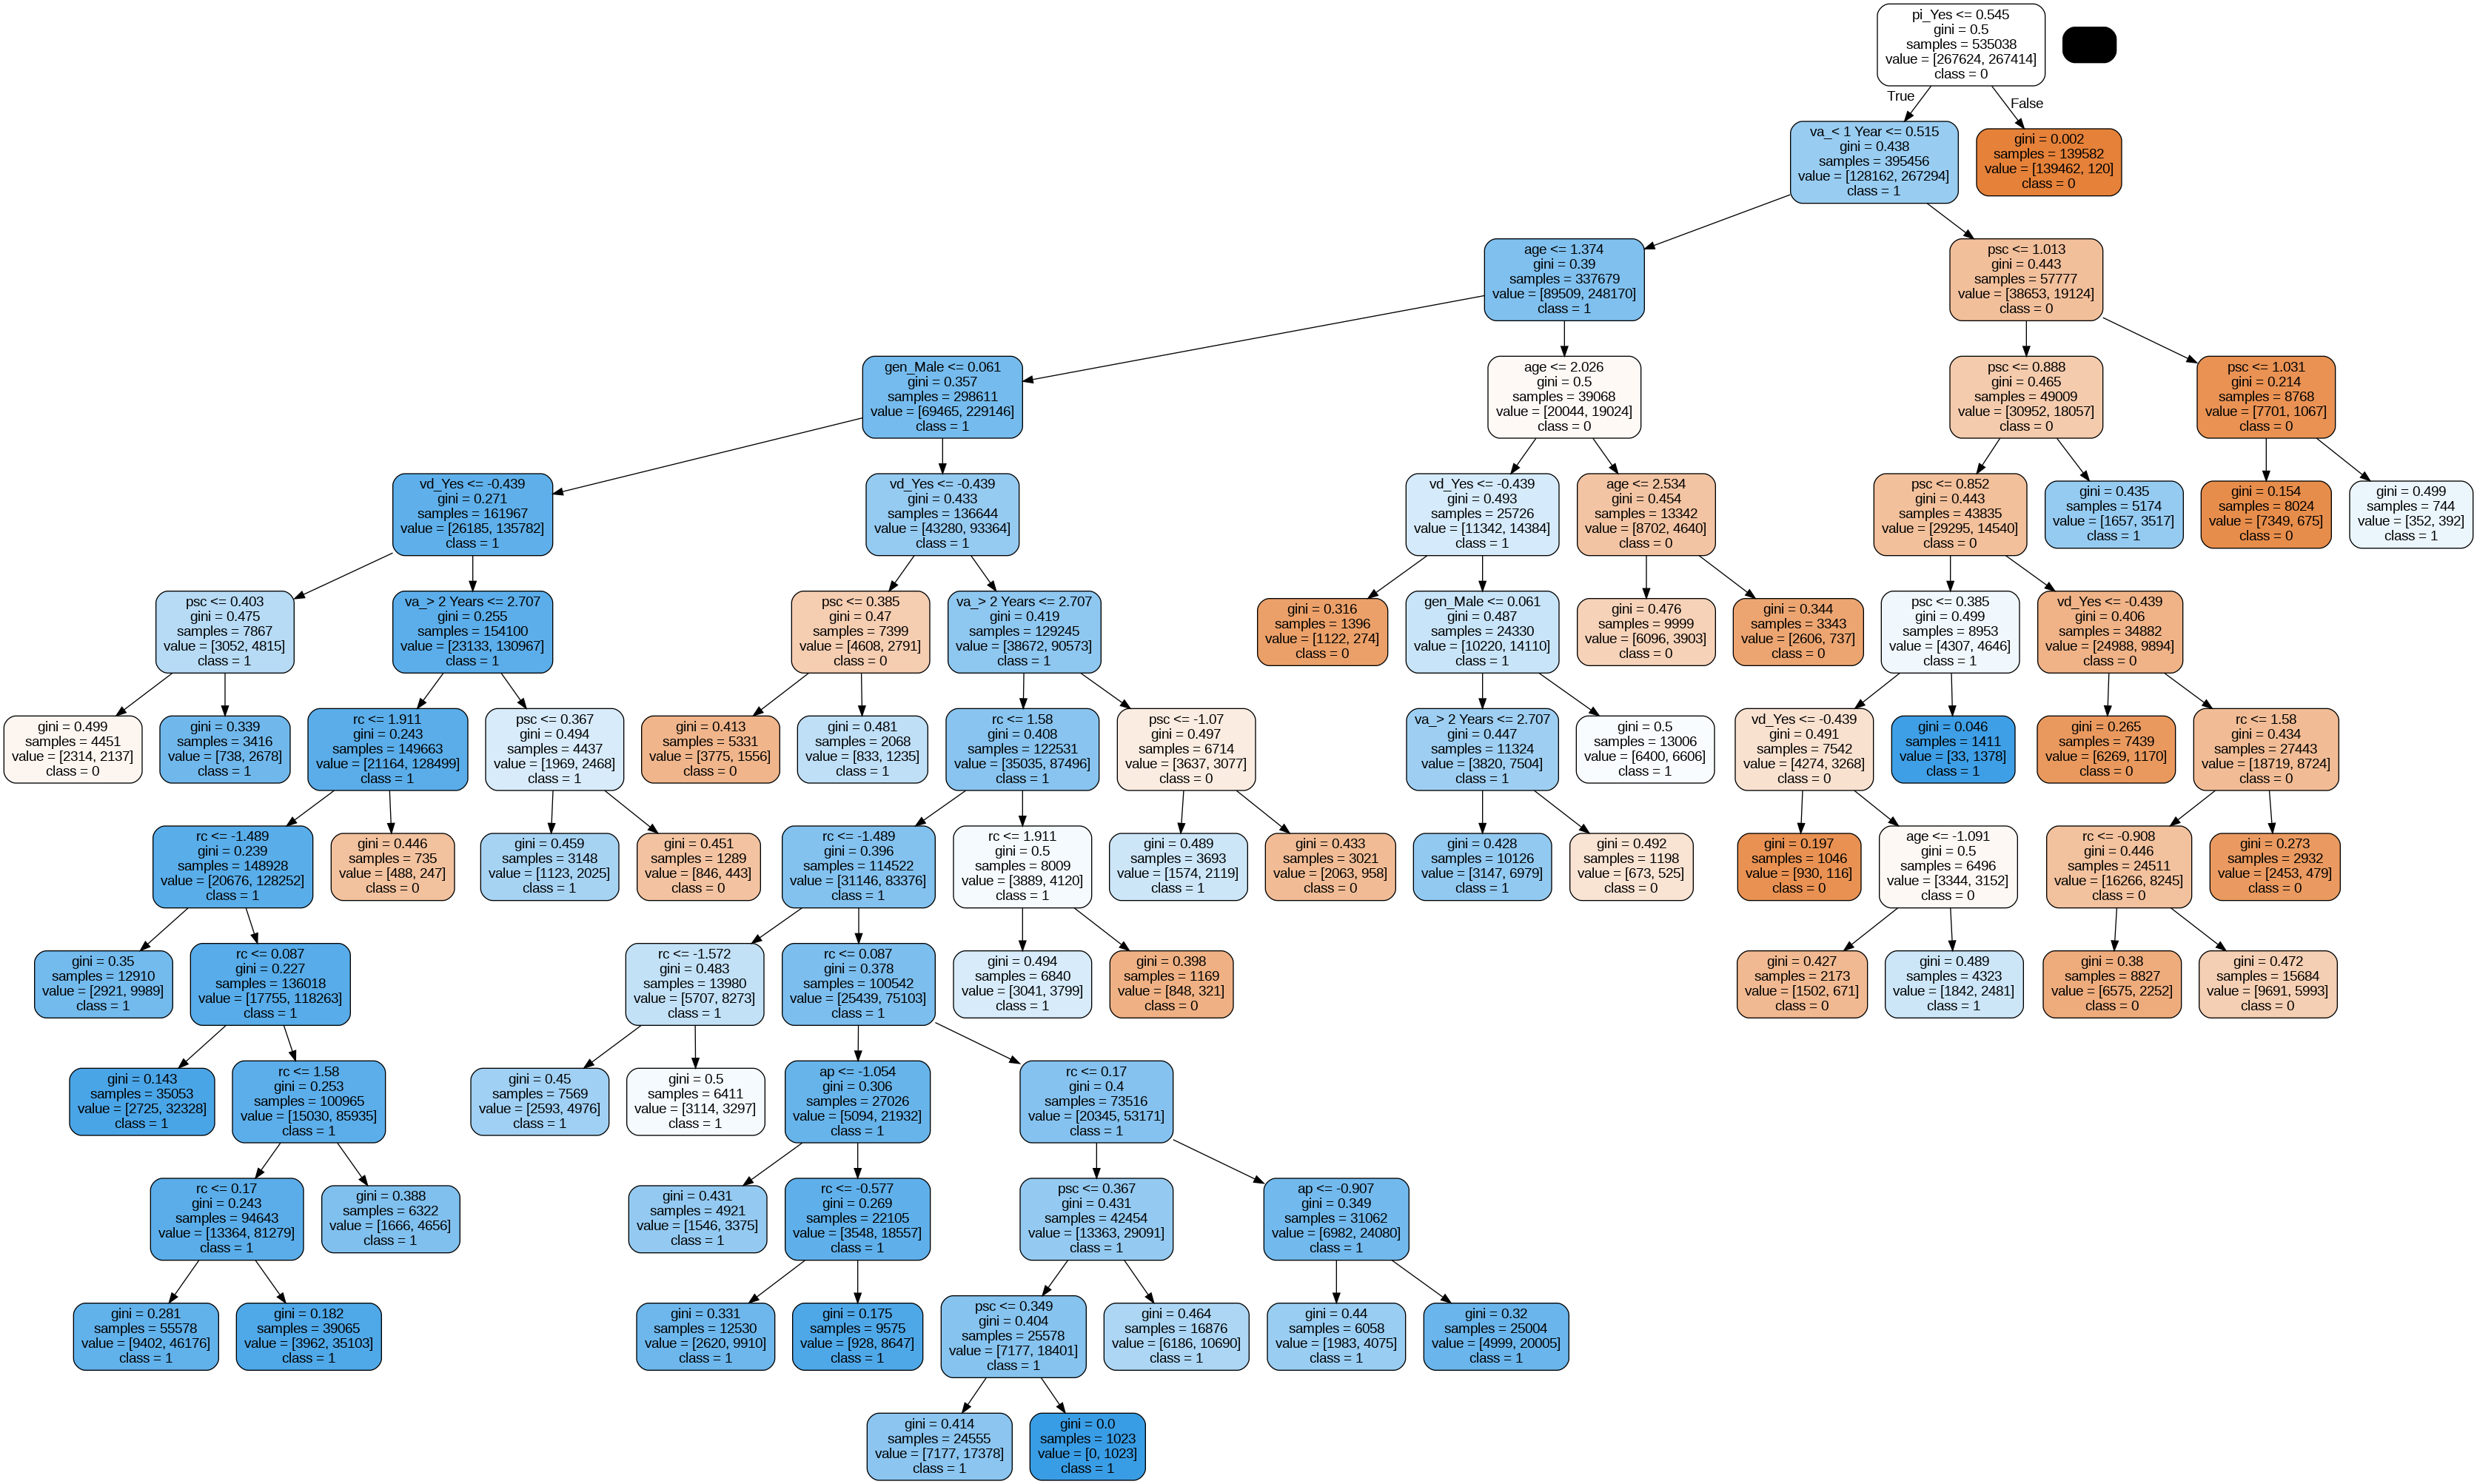

In [ ]:
# Printing Decision Tree

import pydotplus                   # Pydotplus allows Python programmers to create, manipulate, and render graphs in various formats, including PDF, SVG, PNG.
from sklearn import tree
from IPython.display import Image  # Imports the Image class from the IPython.display module, which is used to display the decision tree image.

dot_data = tree.export_graphviz(x,rounded=True,feature_names = xsmote.columns,filled=True,class_names = ['0','1'])
a = pydotplus.graph_from_dot_data(dot_data)
Image(a.create_png())

In [ ]:
# Checking various evaluation metrics.

ac = accuracy_score(ytest,rarg)
print('Accuracy Score  :',ac)

ps = precision_score(ytest,rarg)
print('Precision Score :',ps)

rs = recall_score(ytest,rarg)
print('Recall Score    :',rs)

fs = f1_score(ytest,rarg)
print('F1 Score        :',fs)

Accuracy Score  : 0.8243122009569378
Precision Score : 0.7743290813429728
Recall Score    : 0.9161901918339926
F1 Score        : 0.8393074492963717


* ***We are getting an Accuracy Score of 82% for this model.***

* ***We are getting an F1 Score (Harmonic mean of Precision and Recall score) of 84% for this model.***



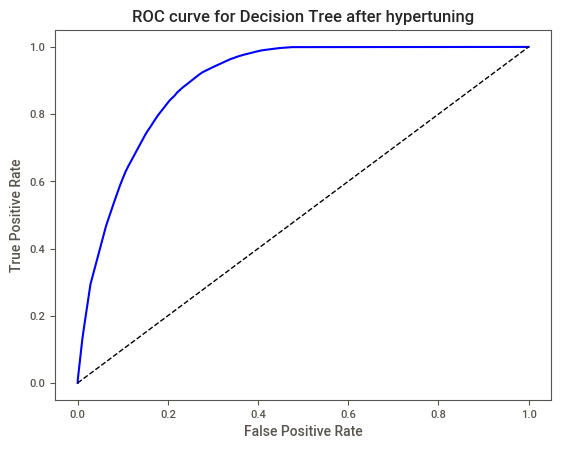

In [ ]:
# Plotting Roc curve.

fpr, tpr, _ = roc_curve(ytest,ypp)
plt.plot(fpr, tpr, color = 'b')
plt.title('ROC curve for Decision Tree after hypertuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1), linestyle = "--", color = 'black', lw = 1)

* ***Upper half diagonal represent True Positive Rate or how efficiently this model is identifying positive instances i.e. 1.***

* ***Lower half diagonal represent False Positive Rate or how inefficiently this model is identifying positive instances i.e. 1.***

In [ ]:
# Calculating Roc Auc Score for this model.

roc = roc_auc_score(ytest,ypred)
print('Roc Auc Score   :',roc)

Roc Auc Score   : 0.8065836065210932


* ***We are getting an Roc Auc Score ( Ability of the model to distinguish between classes.) of 81% for this model.***

In [ ]:
# Storing these metrics in a dictionary.

dict1 = {'Model'           : 'Decision Tree Using RandomizedSearchCV',
         'Accuracy Score'  : round((ac),2),
         'Precision Score' : round((ps),2),
         'Recall Score'    : round((rs),2),
         'F1 Score'        : round((fs),2),
         'Roc Auc Score'   : round((roc),2)}
dict1

{'Model': 'Decision Tree Using RandomizedSearchCV',
 'Accuracy Score': 0.82,
 'Precision Score': 0.77,
 'Recall Score': 0.92,
 'F1 Score': 0.84,
 'Roc Auc Score': 0.81}

In [ ]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model  Accuracy Score  Precision Score  \
0                     Logistic Regression            0.81             0.77   
1                           Decision Tree            0.81             0.78   
2  Decision Tree Using RandomizedSearchCV            0.82             0.77   

   Recall Score  F1 Score  Roc Auc Score  
0          0.89      0.83           0.81  
1          0.85      0.81           0.81  
2          0.92      0.84           0.81

###**Random Forest**

####**Fitting the model**

In [ ]:
# Creating an object of this model and fitting training data.

rfc = RandomForestClassifier(n_jobs = -1)

rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_jobs=-1)

In [ ]:
# Using this model on our testing data to predict responses.

ypred = pd.DataFrame(rfc.predict(xtest))
ypred

0
0       1
1       1
2       0
3       1
4       1
...    ..
133755  1
133756  0
133757  0
133758  1
133759  0

[133760 rows x 1 columns]

In [ ]:
# Predicting probabilities for testing set for both responses.

ypp = pd.DataFrame(rfc.predict_proba(xtest)[: , 1])    # Predicting probabilities only for positive class.

####**Evaluation Metrics**

In [ ]:
# Confusion Matrix

c = confusion_matrix(ytest,ypred)

print('Confusion Matrix   :\n',c)

Confusion Matrix   :
 [[55039 11736]
 [ 6018 60967]]


Text(0.5, 1.0, 'Confusion Matrix')

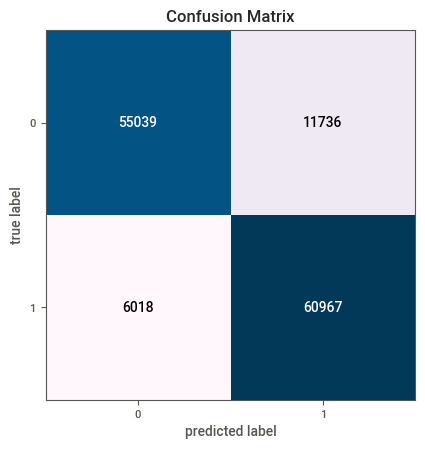

In [ ]:
# Plotting confusion matrix for this model.

fig, ax = plot_confusion_matrix(c, cmap = 'PuBu')
plt.title('Confusion Matrix')

In [ ]:
# Checking various evaluation metrics.

ac = accuracy_score(ytest,ypred)
print('Accuracy Score  :',ac)

ps = precision_score(ytest,ypred)
print('Precision Score :',ps)

rs = recall_score(ytest,ypred)
print('Recall Score    :',rs)

fs = f1_score(ytest,ypred)
print('F1 Score        :',fs)

Accuracy Score  : 0.8672697368421053
Precision Score : 0.8385761247816459
Recall Score    : 0.91015899081884
F1 Score        : 0.872902468358055


* ***We are getting an Accuracy Score of 87% for this model.***

* ***We are getting an F1 Score (Harmonic mean of Precision and Recall score) of 87% for this model.***

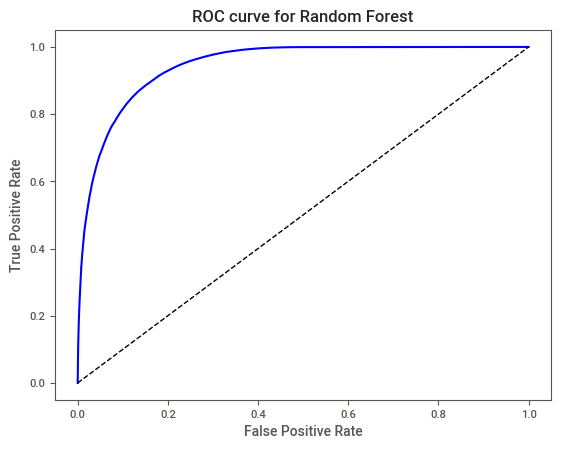

In [ ]:
# Plotting Roc curve.

fpr, tpr, _ = roc_curve(ytest,ypp)
plt.plot(fpr, tpr, color = 'b')
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1), linestyle = "--", color = 'black', lw = 1)

* ***Upper half diagonal represent True Positive Rate or how efficiently this model is identifying positive instances i.e. 1.***

* ***Lower half diagonal represent False Positive Rate or how inefficiently this model is identifying positive instances i.e. 1.***

In [ ]:
# Calculating Roc Auc Score for this model.

roc = roc_auc_score(ytest,ypred)
print('Roc Auc Score   :',roc)

Roc Auc Score   : 0.86720229585869


* ***We are getting an Roc Auc Score ( Ability of the model to distinguish between classes.) of 87% for this model.***

In [ ]:
# Storing these metrics in a dictionary.

dict1 = {'Model'           : 'Random Forest',
         'Accuracy Score'  : round((ac),2),
         'Precision Score' : round((ps),2),
         'Recall Score'    : round((rs),2),
         'F1 Score'        : round((fs),2),
         'Roc Auc Score'   : round((roc),2)}
dict1

{'Model': 'Random Forest',
 'Accuracy Score': 0.87,
 'Precision Score': 0.84,
 'Recall Score': 0.91,
 'F1 Score': 0.87,
 'Roc Auc Score': 0.87}

In [ ]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model  Accuracy Score  Precision Score  \
0                     Logistic Regression            0.81             0.77   
1                           Decision Tree            0.81             0.78   
2  Decision Tree Using RandomizedSearchCV            0.82             0.77   
3                           Random Forest            0.87             0.84   

   Recall Score  F1 Score  Roc Auc Score  
0          0.89      0.83           0.81  
1          0.85      0.81           0.81  
2          0.92      0.84           0.81  
3          0.91      0.87           0.87

####**Cross-Validation & Hyperparameter Tuning**

#####**Random Forest using RandomizedSearchCV**

In [ ]:
# Importing RandomizedSearchCV and fitting the training set for hyperparameter tuning and cross validation.

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': np.arange(10), 'max_depth' : np.arange(10), 'max_features' : np.arange(20), 'max_leaf_nodes' : np.arange(50), 'min_samples_split' : np.arange(10), 'min_samples_leaf' : np.arange(10)}
rfcr = RandomizedSearchCV(rfc,param_grid,scoring='accuracy',cv=3,n_jobs = -1)
rfcr.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                                        'max_leaf_nodes': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='accuracy')

In [ ]:
# Storing best updated parameters after hyperparameter tuning.

x = rfcr.best_estimator_

In [ ]:
# Calculating probabilities for both classes.

ypp = pd.DataFrame(rfcr.predict_proba(xtest)[: , 1])    # Predicting probabilities only for positive class.

In [ ]:
# Testing updated decision tree model on testing set.

rarg = pd.DataFrame(rfcr.predict(xtest))
rarg

0
0       1
1       1
2       0
3       1
4       1
...    ..
133755  1
133756  0
133757  0
133758  1
133759  0

[133760 rows x 1 columns]

In [ ]:
# Calculating best parameters for our model by hyperparamter tuning.

print('Best parameter -',rfcr.best_params_)
print('Best score     -',rfcr.best_score_)
print('Best estimator -',rfcr.best_estimator_)

Best parameter - {'n_estimators': 5, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_leaf_nodes': 32, 'max_features': 6, 'max_depth': 9}
Best score     - 0.8230518206183487
Best estimator - RandomForestClassifier(max_depth=9, max_features=6, max_leaf_nodes=32,
                       min_samples_leaf=4, min_samples_split=4, n_estimators=5,
                       n_jobs=-1)


In [ ]:
# Checking various evaluation metrics.

ac = accuracy_score(ytest,rarg)
print('Accuracy Score  :',ac)

ps = precision_score(ytest,rarg)
print('Precision Score :',ps)

rs = recall_score(ytest,rarg)
print('Recall Score    :',rs)

fs = f1_score(ytest,rarg)
print('F1 Score        :',fs)

Accuracy Score  : 0.824686004784689
Precision Score : 0.7815721732831439
Recall Score    : 0.9020079122191536
F1 Score        : 0.8374823275025643


* ***We are getting an Accuracy Score of 82% for this model.***

* ***We are getting an F1 Score (Harmonic mean of Precision and Recall score) of 83% for this model.***



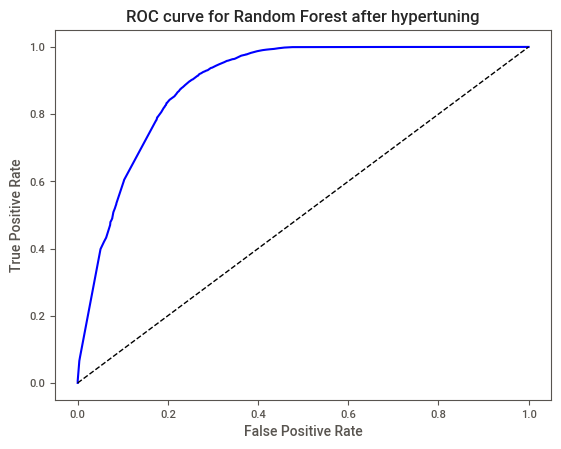

In [ ]:
# Plotting Roc curve.

fpr, tpr, _ = roc_curve(ytest,ypp)
plt.plot(fpr, tpr, color = 'b')
plt.title('ROC curve for Random Forest after hypertuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1), linestyle = "--", color = 'black', lw = 1)

* ***Upper half diagonal represent True Positive Rate or how efficiently this model is identifying positive instances i.e. 1.***

* ***Lower half diagonal represent False Positive Rate or how inefficiently this model is identifying positive instances i.e. 1.***

In [ ]:
# Calculating Roc Auc Score for this model.

roc = roc_auc_score(ytest,ypred)
print('Roc Auc Score   :',roc)

Roc Auc Score   : 0.86720229585869


* ***We are getting an Roc Auc Score ( Ability of the model to distinguish between classes.) of 86% for this model.***

In [ ]:
# Storing these metrics in a dictionary.

dict1 = {'Model'           : 'Random Forest Using RandomizedSearchCV',
         'Accuracy Score'  : round((ac),2),
         'Precision Score' : round((ps),2),
         'Recall Score'    : round((rs),2),
         'F1 Score'        : round((fs),2),
         'Roc Auc Score'   : round((roc),2)}
dict1

{'Model': 'Random Forest Using RandomizedSearchCV',
 'Accuracy Score': 0.82,
 'Precision Score': 0.78,
 'Recall Score': 0.9,
 'F1 Score': 0.84,
 'Roc Auc Score': 0.87}

In [ ]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model  Accuracy Score  Precision Score  \
0                     Logistic Regression            0.81             0.77   
1                           Decision Tree            0.81             0.78   
2  Decision Tree Using RandomizedSearchCV            0.82             0.77   
3                           Random Forest            0.87             0.84   
4  Random Forest Using RandomizedSearchCV            0.82             0.78   

   Recall Score  F1 Score  Roc Auc Score  
0          0.89      0.83           0.81  
1          0.85      0.81           0.81  
2          0.92      0.84           0.81  
3          0.91      0.87           0.87  
4          0.90      0.84           0.87

###**Naive Bayes**

####**Fitting the model**

In [ ]:
# Creating an object of this model and fitting training data.

from sklearn.naive_bayes import GaussianNB    # Importing the algorithm.

nb = GaussianNB()

nb.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
# Using this model on our testing data to predict responses.

ypred = pd.DataFrame(nb.predict(xtest))
ypred

0
0       1
1       1
2       0
3       1
4       1
...    ..
133755  1
133756  0
133757  0
133758  1
133759  1

[133760 rows x 1 columns]

####**Evaluation Metrics**

In [ ]:
# Confusion Matrix

c = confusion_matrix(ytest,ypred)

print('Confusion Matrix   :\n',c)

Confusion Matrix   :
 [[46751 20024]
 [ 6327 60658]]


Text(0.5, 1.0, 'Confusion Matrix')

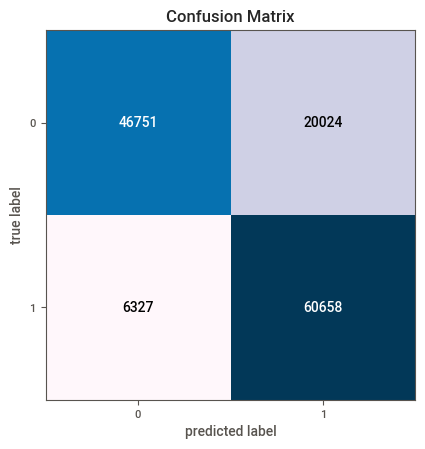

In [ ]:
# Plotting confusion matrix for this model.

fig, ax = plot_confusion_matrix(c, cmap = 'PuBu')
plt.title('Confusion Matrix')

In [ ]:
# Checking various evaluation metrics.

ac = accuracy_score(ytest,ypred)
print('Accuracy Score  :',ac)

ps = precision_score(ytest,ypred)
print('Precision Score :',ps)

rs = recall_score(ytest,ypred)
print('Recall Score    :',rs)

fs = f1_score(ytest,ypred)
print('F1 Score        :',fs)

Accuracy Score  : 0.8029979066985646
Precision Score : 0.75181577055601
Recall Score    : 0.9055460177651713
F1 Score        : 0.8215511928866978


* ***We are getting an Accuracy Score of 80% for this model.***

* ***We are getting an F1 Score (Harmonic mean of Precision and Recall score) of 82% for this model.***

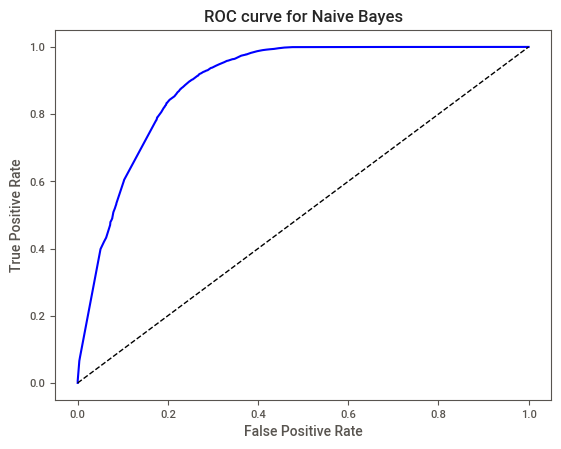

In [ ]:
# Plotting Roc curve.

fpr, tpr, _ = roc_curve(ytest,ypp)
plt.plot(fpr, tpr, color = 'b')
plt.title('ROC curve for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1), linestyle = "--", color = 'black', lw = 1)

* ***Upper half diagonal represent True Positive Rate or how efficiently this model is identifying positive instances i.e. 1.***

* ***Lower half diagonal represent False Positive Rate or how inefficiently this model is identifying positive instances i.e. 1.***

In [ ]:
# Calculating Roc Auc Score for this model.

roc = roc_auc_score(ytest,ypred)
print('Roc Auc Score   :',roc)

Roc Auc Score   : 0.8028366554569024


* ***We are getting an Roc Auc Score ( Ability of the model to distinguish between classes.) of 80% for this model.***

In [ ]:
# Storing these metrics in a dictionary.

dict1 = {'Model'           : 'Naive Bayes',
         'Accuracy Score'  : round((ac),2),
         'Precision Score' : round((ps),2),
         'Recall Score'    : round((rs),2),
         'F1 Score'        : round((fs),2),
         'Roc Auc Score'   : round((roc),2)}
dict1

{'Model': 'Naive Bayes',
 'Accuracy Score': 0.8,
 'Precision Score': 0.75,
 'Recall Score': 0.91,
 'F1 Score': 0.82,
 'Roc Auc Score': 0.8}

In [ ]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model  Accuracy Score  Precision Score  \
0                     Logistic Regression            0.81             0.77   
1                           Decision Tree            0.81             0.78   
2  Decision Tree Using RandomizedSearchCV            0.82             0.77   
3                           Random Forest            0.87             0.84   
4  Random Forest Using RandomizedSearchCV            0.82             0.78   
5                             Naive Bayes            0.80             0.75   

   Recall Score  F1 Score  Roc Auc Score  
0          0.89      0.83           0.81  
1          0.85      0.81           0.81  
2          0.92      0.84           0.81  
3          0.91      0.87           0.87  
4          0.90      0.84           0.87  
5          0.91      0.82           0.80

####**Cross-Validation & Hyperparameter Tuning**

#####**Naive Bayes using RandomizedSearchCV**

In [ ]:
# Importing RandomizedSearchCV and fitting the training set for hyperparameter tuning and cross validation.

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'var_smoothing' : np.arange(0.0000001)}
nbr = RandomizedSearchCV(nb, param_grid, scoring='accuracy', cv=5 ,n_jobs = -1)
nbr.fit(xtrain, ytrain)
print('Best score     -',nbr.best_score_)

Best score     - 0.8006851843690033


In [ ]:
# Storing best updated parameters after hyperparameter tuning.

x = nbr.best_estimator_

In [ ]:
# Testing updated decision tree model on testing set.

rarg = pd.DataFrame(nbr.predict(xtest))
rarg

0
0       1
1       1
2       0
3       1
4       1
...    ..
133755  1
133756  0
133757  0
133758  1
133759  1

[133760 rows x 1 columns]

In [ ]:
# Calculating best parameters for our model by hyperparamter tuning.

print('Best parameter -',nbr.best_params_)
print('Best score     -',nbr.best_score_)
print('Best estimator -',nbr.best_estimator_)

Best parameter - {'var_smoothing': 0.0}
Best score     - 0.8006851843690033
Best estimator - GaussianNB(var_smoothing=0.0)


In [ ]:
# Checking various evaluation metrics.

ac = accuracy_score(ytest,rarg)
print('Accuracy Score  :',ac)

ps = precision_score(ytest,rarg)
print('Precision Score :',ps)

rs = recall_score(ytest,rarg)
print('Recall Score    :',rs)

fs = f1_score(ytest,rarg)
print('F1 Score        :',fs)

Accuracy Score  : 0.8029979066985646
Precision Score : 0.75181577055601
Recall Score    : 0.9055460177651713
F1 Score        : 0.8215511928866978


* ***We are getting an Accuracy Score of 80% for this model.***

* ***We are getting an F1 Score (Harmonic mean of Precision and Recall score) of 82% for this model.***



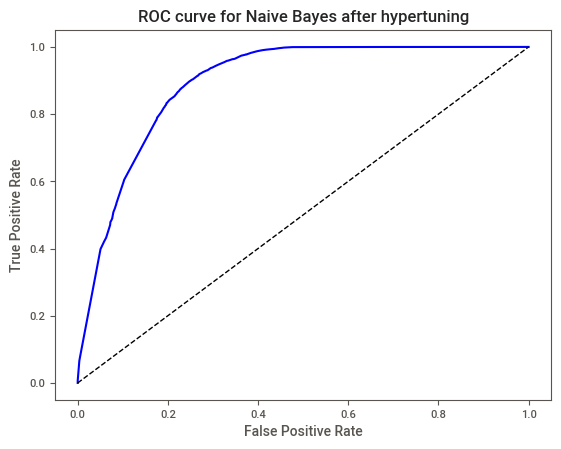

In [ ]:
# Plotting Roc curve.

fpr, tpr, _ = roc_curve(ytest,ypp)
plt.plot(fpr, tpr, color = 'b')
plt.title('ROC curve for Naive Bayes after hypertuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1), linestyle = "--", color = 'black', lw = 1)

* ***Upper half diagonal represent True Positive Rate or how efficiently this model is identifying positive instances i.e. 1.***

* ***Lower half diagonal represent False Positive Rate or how inefficiently this model is identifying positive instances i.e. 1.***

In [ ]:
# Calculating Roc Auc Score for this model.

roc = roc_auc_score(ytest,ypred)
print('Roc Auc Score   :',roc)

Roc Auc Score   : 0.8028366554569024


* ***We are getting an Roc Auc Score ( Ability of the model to distinguish between classes.) of 80% for this model.***

In [ ]:
# Storing these metrics in a dictionary.

dict1 = {'Model'           : 'Naive Bayes Using RandomizedSearchCV',
         'Accuracy Score'  : round((ac),2),
         'Precision Score' : round((ps),2),
         'Recall Score'    : round((rs),2),
         'F1 Score'        : round((fs),2),
         'Roc Auc Score'   : round((roc),2)}
dict1

{'Model': 'Naive Bayes Using RandomizedSearchCV',
 'Accuracy Score': 0.8,
 'Precision Score': 0.75,
 'Recall Score': 0.91,
 'F1 Score': 0.82,
 'Roc Auc Score': 0.8}

In [ ]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model  Accuracy Score  Precision Score  \
0                     Logistic Regression            0.81             0.77   
1                           Decision Tree            0.81             0.78   
2  Decision Tree Using RandomizedSearchCV            0.82             0.77   
3                           Random Forest            0.87             0.84   
4  Random Forest Using RandomizedSearchCV            0.82             0.78   
5                             Naive Bayes            0.80             0.75   
6    Naive Bayes Using RandomizedSearchCV            0.80             0.75   

   Recall Score  F1 Score  Roc Auc Score  
0          0.89      0.83           0.81  
1          0.85      0.81           0.81  
2          0.92      0.84           0.81  
3          0.91      0.87           0.87  
4          0.90      0.84           0.87  
5          0.91      0.82           0.80  
6          0.91      0.82           0.80

###**Gradient Boosting**

####**Fitting the model**

In [ ]:
# Importing the algorithm and fitting variables in it.

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(xtrain,ytrain)


GradientBoostingClassifier()

In [ ]:
# Using this model on our testing data to predict responses.

ypred = pd.DataFrame(gbc.predict(xtest))
ypred

0
0       1
1       1
2       0
3       1
4       1
...    ..
133755  1
133756  0
133757  0
133758  1
133759  0

[133760 rows x 1 columns]

In [ ]:
# Predicting probabilities for testing set for both responses.

ypp = pd.DataFrame(gbc.predict_proba(xtest)[: , 1])    # Predicting probabilities only for positive class.

####**Evaluation Metrics**

In [ ]:
# Confusion Matrix

c = confusion_matrix(ytest,ypred)

print('Confusion Matrix   :\n',c)

Confusion Matrix   :
 [[49979 16796]
 [ 5692 61293]]


Text(0.5, 1.0, 'Confusion Matrix')

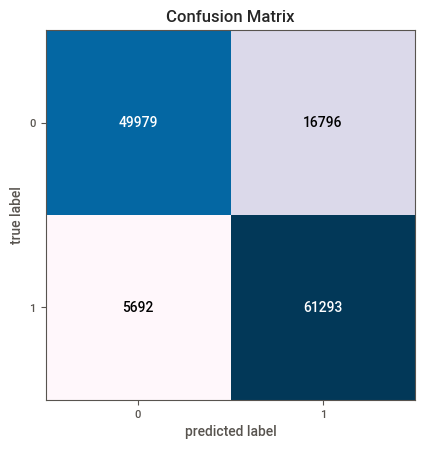

In [ ]:
# Plotting confusion matrix for this model.

fig, ax = plot_confusion_matrix(c, cmap = 'PuBu')
plt.title('Confusion Matrix')

In [ ]:
# Checking various evaluation metrics.

ac = accuracy_score(ytest,ypred)
print('Accuracy Score  :',ac)

ps = precision_score(ytest,ypred)
print('Precision Score :',ps)

rs = recall_score(ytest,ypred)
print('Recall Score    :',rs)

fs = f1_score(ytest,ypred)
print('F1 Score        :',fs)

Accuracy Score  : 0.831877990430622
Precision Score : 0.7849120874899154
Recall Score    : 0.9150257520340375
F1 Score        : 0.844989453658133


* ***We are getting an Accuracy Score of 83% for this model.***

* ***We are getting an F1 Score (Harmonic mean of Precision and Recall score) of 85% for this model.***

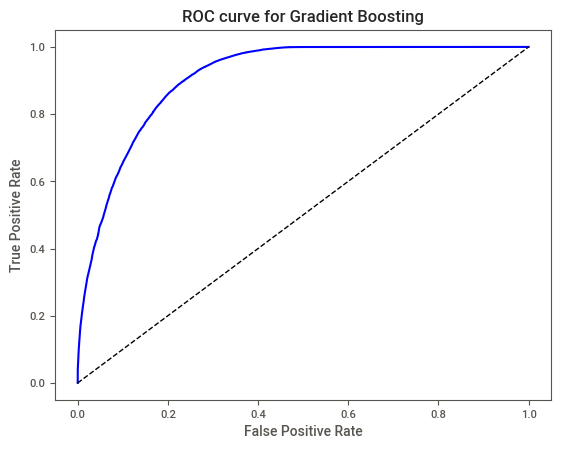

In [ ]:
# Plotting Roc curve.

fpr, tpr, _ = roc_curve(ytest,ypp)
plt.plot(fpr, tpr, color = 'b')
plt.title('ROC curve for Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1), linestyle = "--", color = 'black', lw = 1)

* ***Upper half diagonal represent True Positive Rate or how efficiently this model is identifying positive instances i.e. 1.***

* ***Lower half diagonal represent False Positive Rate or how inefficiently this model is identifying positive instances i.e. 1.***

In [ ]:
# Calculating Roc Auc Score for this model.

roc = roc_auc_score(ytest,ypred)
print('Roc Auc Score   :',roc)

Roc Auc Score   : 0.8317472451671498


* ***We are getting an Roc Auc Score ( Ability of the model to distinguish between classes.) of 87% for this model.***

In [ ]:
# Storing these metrics in a dictionary.

dict1 = {'Model'           : 'Gradient Boosting',
         'Accuracy Score'  : round((ac),2),
         'Precision Score' : round((ps),2),
         'Recall Score'    : round((rs),2),
         'F1 Score'        : round((fs),2),
         'Roc Auc Score'   : round((roc),2)}
dict1

{'Model': 'Gradient Boosting',
 'Accuracy Score': 0.83,
 'Precision Score': 0.78,
 'Recall Score': 0.92,
 'F1 Score': 0.84,
 'Roc Auc Score': 0.83}

In [ ]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model  Accuracy Score  Precision Score  \
0                     Logistic Regression            0.81             0.77   
1                           Decision Tree            0.81             0.78   
2  Decision Tree Using RandomizedSearchCV            0.82             0.77   
3                           Random Forest            0.87             0.84   
4  Random Forest Using RandomizedSearchCV            0.82             0.78   
5                             Naive Bayes            0.80             0.75   
6    Naive Bayes Using RandomizedSearchCV            0.80             0.75   
7                       Gradient Boosting            0.83             0.78   

   Recall Score  F1 Score  Roc Auc Score  
0          0.89      0.83           0.81  
1          0.85      0.81           0.81  
2          0.92      0.84           0.81  
3          0.91      0.87           0.87  
4          0.90      0.84           0.87  
5          0.91      0.82           0.80  
6          0.91      0.82           0.80  
7          0.92      0.84           0.83

###**Model Explainibility**

**What is model explainibility ?**

* ***We can define model explainibility as the process in which most important features that contributed in the prediction of an output are depicted as a result.***


####**Feature Importance for Random Forest**

In [ ]:
# Creating a variable to store feature importance.

feat = xsmote.columns
imp = rfc.feature_importances_

Text(0, 0.5, 'Features')

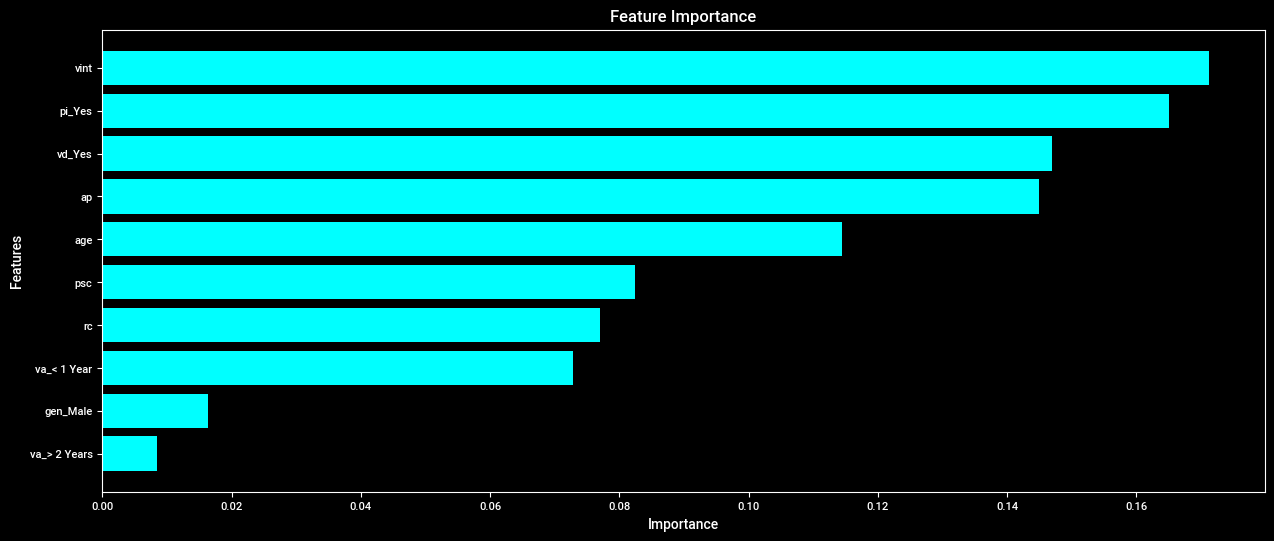

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(imp)

# Rearrange feature names accordingly
feature_names = feat[indices]

# Plot feature importances
plt.style.use('dark_background')
plt.figure(figsize=(15, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), imp[indices], color = 'aqua', align = 'center')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")

* ***As we can conclude by the above graph that 'Vintage', 'Previously Insured', 'Vehicle Damage' and 'Annual Premium' were the top features that contributed the most in predicting the output in 'Random Forest' model which has the highest accuracy score of 87 %.***

#**Conclusion**

###**Data collection**
* ***In the early stages of this project, we loaded and collected our data, stored it in the dataframe, and performed some basic analysis like checking out shape, dimensions, etc.***

###**EDA**
* ***In the process of EDA, we followed the thumb rule of analysis, i.e., UBM (univariate, bivariate, and Multivariate Analysis).***

* ***In Univariate analysis, we checked out the distributions of each numerical feature independently with the help of a distplot and histogram, whereas we used a countplot for categorical features.***

* ***In Bivariate analysis, we plotted our target variable 'res' against each independent feature with the help of a count plot and histogram to derive valuable insights.***

* ***In Multivariate analysis, we used the Python library 'sweetviz' to perform multivariate analysis, and we also used 'correlation Heatmap'.***


###**Hypothesis Testing**

* ***We performed our Hypothesis on these 3 statements :***
 * **The average yearly rate for auto insurance is more than 15,000.**

 *  **The average consumer is over 29 years old.**

 * **The yearly premium standard deviation is 15,000.**

* ***We used Z-test and chi2 test to derive our conclusions.***

###**Feature engineering and Data preprocessing**

* ***No outliers were detected in our independent numerical features, excluding 'Annual Premium'.***

* ***We used the trimming technique for our outlier treatment.***

* ***In our 'Data preprocessing' part :***
 *   ***We used the VIF (Variance Inflation Factor) method to check out the correlation between numerical features but found none.***

 *   ***We performed 'One Hot Encoding' on our dataset and removed the first encoded feature to avoid multicollinearity, and we also dropped the 'Driving Licence column.***

 * ***Our target variable was heavily imbalanced, so to reduce the difference between both classes, we used the SMOTE technique to balance our dataset.***

###**Model Training**

* ***We performed a train-ttest split of 80:20 in our dataset.***

* ***In the next step, we scaled our data with the help of StandardScaler().***

#####***Model Implementation :***
 * ***In the dataframe below are all the evaluation metrics and models that we implemented on our dataset:***

In [ ]:
cdf

Model  Accuracy Score  Precision Score  \
0                     Logistic Regression            0.81             0.77   
1                           Decision Tree            0.81             0.78   
2  Decision Tree Using RandomizedSearchCV            0.82             0.77   
3                           Random Forest            0.87             0.84   
4  Random Forest Using RandomizedSearchCV            0.82             0.78   
5                             Naive Bayes            0.80             0.75   
6    Naive Bayes Using RandomizedSearchCV            0.80             0.75   
7                       Gradient Boosting            0.83             0.78   

   Recall Score  F1 Score  Roc Auc Score  
0          0.89      0.83           0.81  
1          0.85      0.81           0.81  
2          0.92      0.84           0.81  
3          0.91      0.87           0.87  
4          0.90      0.84           0.87  
5          0.91      0.82           0.80  
6          0.91      0.82           0.80  
7          0.92      0.84           0.83

* ***We attained the highest accuracy through the Random Forest' model of 87%.***

* ***No overfitting is seen.***




***Finally, the insurance business may apply a machine learning model based on the Random Forest Classifier to forecast if an existing health insurance client would be interested in a motor insurance policy. The firm may increase the conversion rate by taking initiatives to encourage individuals to get automobile insurance by giving incentives or simplifying the application and claim settlement procedures. Because the client acquisition cost stays zero, cross-selling may be an efficient way to boost earnings.***